## Исследование данных о российском кинопрокате



### Шаг предварительный.

**Описание проекта** 

Заказчик этого исследования — Министерство культуры Российской Федерации. Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. **Уделите внимание фильмам, которые получили государственную поддержку.** Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Расшифровка названий столбцов**

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма;
- `box_office` — сборы в рублях.


### Шаг 1. Загрузка данных и объединение в один датафрейм

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
# Задаём переменную с путём к папке
data_path = '/Users/Denis/Documents/Личное/Курсы повышения квалификации/Data science/Мои проекты/Сброный проект - 1/'

In [3]:
#movies = pd.read_csv('/datasets/mkrf_movies.csv')
#shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [4]:
# Загружаем файлы, используя f-строку
movies = pd.read_csv(f'{data_path}mkrf_movies.csv')
shows = pd.read_csv(f'{data_path}mkrf_shows.csv')

In [5]:
shows.info()
print()
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 

**Наблюдения**
1. `PuNumber` - в таблице "Movies" видно, что используются строковые значения, а не целочисленные. Надо проверить.
2. `PuNumber` - следовало бы привести к змеиному регистру `pu_number`.
3. Объединять будем по столбцу `PuNumber`.


In [6]:
shows.head(10)

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"
5,111000119,"4,293,649.51"
6,111000212,200.00
7,111000216,"355,567.00"
8,111000313,710.00
9,111000314,"1,607,970.00"


In [7]:
movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [8]:
# посмотрим строковые значения
movies[~movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
movies.loc[804, 'puNumber'] = movies.loc[804, 'puNumber'].strip()
movies.loc[1797, 'puNumber'] = '0'

In [10]:
movies['puNumber'] = pd.to_numeric(movies['puNumber'])
movies['puNumber'].dtype

dtype('int64')

In [11]:
df = movies.merge(shows, on='puNumber', how='left')

In [12]:
# Заменим название столбца:
df.rename(columns = {'puNumber':'pu_number'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [13]:
# Проверяем данные в столбце 'box_office'
df['box_office'].count()

3158

In [14]:
df.head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

Проверим типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [15]:
df['ratings'].value_counts()

ratings
6.6    312
6.7    308
6.8    261
7.2    252
6.2    243
      ... 
19%      1
90%      1
62%      1
64%      1
9.1      1
Name: count, Length: 94, dtype: int64

In [16]:
# Переведем значения в столбце show_start_date в формат даты:
df['show_start_date']=pd.to_datetime(df['show_start_date'])

# Изменим тип данных столбца ratings:
df['ratings']=pd.to_numeric(df['ratings'],errors='coerce')

# Проверим, как изменились типы данных:
df.info()
print(df['show_start_date'].head())
print(df['ratings'].tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [17]:
temp = df.copy() # создаем копию датасета до преобразования
len(temp)

7486

In [18]:
len(df)

7486

Количество пропусков по столбцам


title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

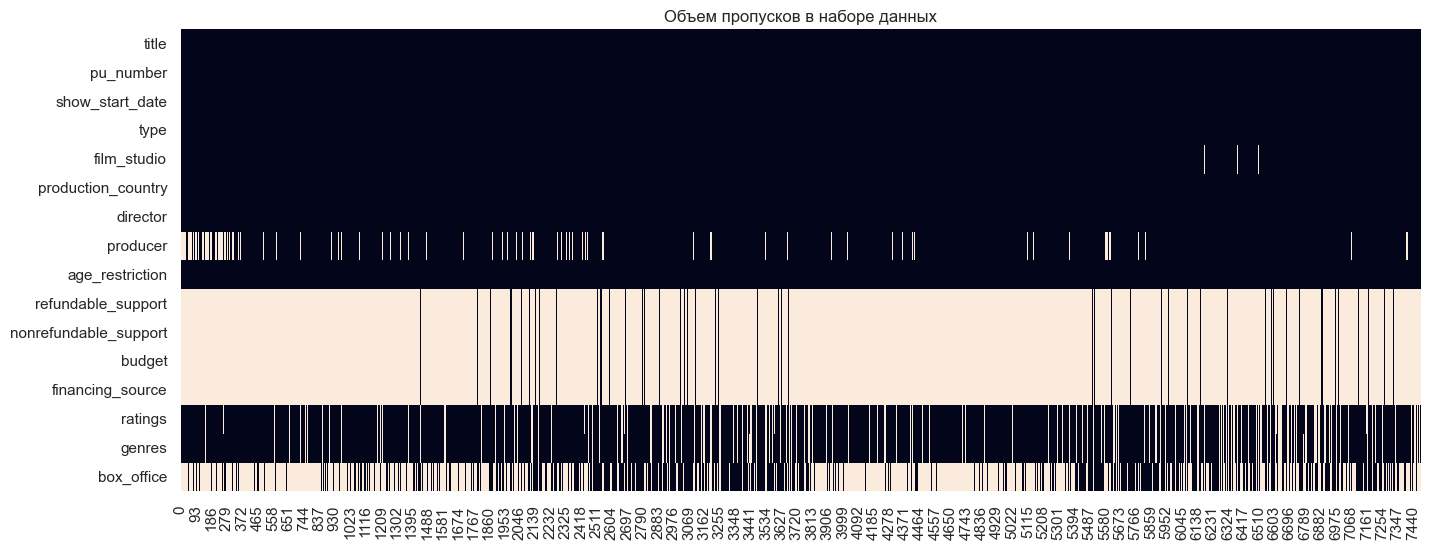

In [19]:
# Изучим пропуски в датафрейме
df.isna().sum()

# Для визуализации пропусков создадим отдельный датафрейм
df_nans = df.isna()
sns.set(rc = {'figure.figsize':(16,6)})
sns.heatmap(df_nans.transpose(), cbar=False).set_title('Объем пропусков в наборе данных')
print('Количество пропусков по столбцам')
df_nans.sum()

In [20]:
df_nans['year'] = df['show_start_date'].dt.year
df_nans['total_records'] = True
df_nans.groupby(by='year').agg(sum).transpose()

/var/folders/vj/zrl1f6497v3146z6rynl8c880000gn/T/ipykernel_59246/4150469333.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_nans.groupby(by='year').agg(sum).transpose()


year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
title,0,0,0,0,0,0,0,0,0,0
pu_number,0,0,0,0,0,0,0,0,0,0
show_start_date,0,0,0,0,0,0,0,0,0,0
type,0,0,0,0,0,0,0,0,0,0
film_studio,1,0,0,0,1,0,0,0,12,4
production_country,1,0,0,0,0,0,1,0,0,0
director,5,2,1,1,0,0,0,0,0,0
producer,40,15,26,89,189,77,54,34,14,30
age_restriction,0,0,0,0,0,0,0,0,0,0
refundable_support,985,622,593,628,791,619,757,464,835,860


In [21]:
len(df)

7486

**Наблюдения**

Количество пропусков не зависит от года.

На тепловой карте видно, что пропуски в колонках `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` находятся на одних и тех же местах. 
Косвенно об этом говорит и матрица распределения пропусков по годам. Раз данные говорят, в том числе об объёме государственной поддержки, то скорее всего факт пропуска связан со страной.

- `film_studio`: у 18 фильмов не указана студия-производитель - заменим пропуски на "неизвестно";
`production_country`: у 2 фильмов не указана страна производства - заменим пропуски на "неизвестно";
- `director`: режиссер не указан в 9 фильмах - заменим пропуски на "неизвестно";
- `producer`: продюсер не указан для 568 фильмах - заменим пропуски на "неизвестно";
только у 5% фильмов есть информация о бюджете фильма, а также об источнике государственного финансирования и объёмах возвратных и невозвратных средств государственной поддержки. Это связано с тем, что для фильмов, которые не получали государственную поддержку, данные о бюджете не указаны. Оставим данные пропуски как есть;
- `ratings`: для 995 фильмов рейтинги не указаны - оставим пропуски как есть;
- `genres`: 976 фильмов остались без информации о жанре - заменим пропуски на "неизвестно";
- `box_office`: 4328 записей о кассовых сборах не заполнены. Вероятно, произошел сбой в выгрузке информации. Также оставим пропуски, чтобы не было искажения информации о кассовых сборах.

In [22]:
# Колонки, в которых допустимо заменить пропуски на "неизвестно"
categorical_na_columns = ['film_studio', 'production_country', 'director', 'producer', 'genres']

# Считаем количество пропусков ДО
missing_before = df[categorical_na_columns].isna().sum()
print("Пропуски ДО замены:")
print(missing_before, end="\n\n")

Пропуски ДО замены:
film_studio            18
production_country      2
director                9
producer              568
genres                976
dtype: int64



In [23]:
# Заполняем пропуски
df[categorical_na_columns] = df[categorical_na_columns].fillna('неизвестно')

# Считаем количество пропусков ПОСЛЕ
missing_after = df[categorical_na_columns].isna().sum()
print("Пропуски ПОСЛЕ замены:")
print(missing_after)

Пропуски ПОСЛЕ замены:
film_studio           0
production_country    0
director              0
producer              0
genres                0
dtype: int64


#### Шаг 2.3. Изучите дубликаты в датафрейме
Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [24]:
# Проверим на явные дубликаты:
df.duplicated().sum()

0

In [25]:
# Проверим теперь, есть ли дубликаты в столбце с номером прокатного удостоверения:
df['pu_number'].duplicated().sum()

2

In [26]:
# Датафрейм содержит всего 2 дубликата - посмотрим на них:
df[df.duplicated(subset=['pu_number'], keep = False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


**Наблюдение**

Видно, что оба "дубликата" на самом деле не являются дубликатами, т.к:

- для `pu_number` 221154310 различается название фильма;
- для `pu_number` 221054410 различаются рейтинги.

Похоже, что это была просто ошибка ввода номера, или технический сбой при присванивании номера выдаваемому прокатному удостоверению. Удалять данные дубликаты нельзя, но можно вручную присвоить им другие номера прокатных удостоверений. Чтобы убедиться, что будут присвоены уникальные номера pu_number, ознакомимся с имеющимися значениями:

In [27]:
df['pu_number'].describe()

count         7,486.00
mean    135,178,527.64
std      38,382,177.41
min               0.00
25%     112,025,043.00
50%     121,015,464.50
75%     124,003,313.75
max     231,001,111.00
Name: pu_number, dtype: float64

In [28]:
# Присвоим два значения pu_number, которые не встречаются (100000000 и 100000001):
df.loc[((df['pu_number'] == 221154310)&(df['title'] == 'Как жениться и остаться холостым')),'pu_number'] = 100000000
df.loc[((df['pu_number'] == 221054410)&(df['title'] == 'Анализируй то!')),'pu_number'] = 100000001

# Проверим теперь, остались ли дубликаты в столбце с номером прокатного удостоверения:
df['pu_number'].duplicated().sum()

0

In [29]:
df['title'].duplicated().sum()

714

In [30]:
df[df.duplicated(subset=['title'], keep = False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.70,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.50,"триллер,драма","175,003.51"
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"триллер,криминал,детектив",NaN


**Наблюдение**

Изучил вопрос, касающийся фильмов, название фильма повторяется, а номер прокатного удостоверения разный. Прокатные удостоверения выдалавались в разное время и для разный целей. Тут нет смысла что либо делать с названиями.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [32]:
obj_df = df.select_dtypes(include=['object']).copy()

In [33]:
obj_df.count()

title                 7486
type                  7486
film_studio           7486
production_country    7486
director              7486
producer              7486
age_restriction       7486
financing_source       332
genres                7486
dtype: int64

**Наблюдение**



In [34]:
obj_df.tail()

,title,type,film_studio,production_country,director,producer,age_restriction,financing_source,genres
7481,Сад художника: Американский импрессионизм,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,неизвестно
7482,Звериная ярость,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,неизвестно
7484,"Машины песенки. Серия ""Испанские мотивы""",Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,неизвестно
7485,"Машины песенки. Серия ""Когда цветут кактусы""",Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,"комедия,вестерн"


In [35]:
# Удалим из столбца type лишние пробелы, которые встречаются в начале и в конце строки:
df['type']=df['type'].str.strip()

# Удалим также и из столбца production_country лишние пробелы, которые встречаются внутри строки:
df['production_country']=df['production_country'].replace(' ','', regex=True)

# Заменим еще в столбце production_country дефис на запятую в целях единообразия разделителей:
df['production_country']=df['production_country'].replace('-',',', regex=True)

**Наблюдение**

Некоторые значения в категориальных переменных хранятся как списки - несколько стран, режиссеров, студий, жанров и т.д. Решением данной пролемы станет выделение первых значений из этих списков.

In [36]:
# Проверяем данные до удаления пробелов
df.head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.60,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР,Венгрия",В.Титов,неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN


In [37]:
# Проверяем данные в столбце title
df['title'].value_counts()

title
День святого Валентина_                               5
Кошки против собак: Месть Китти Галор                 4
Знакомство с Факерами 2.                              4
Рапунцель: Запутанная история                         4
Секс в большом городе 2                               4
                                                     ..
МУЛЬТ в кино. Выпуск № 14                             1
Стажёр                                                1
Мэхэббэт - ул йорэк эше (Любовь - это дело сердца)    1
Иван Грозный - 2 серия (восстановленная версия)       1
Машины песенки. Серия "Когда цветут кактусы"          1
Name: count, Length: 6772, dtype: int64

In [38]:
# Проверяем данные в столбце type
df['type'].value_counts()

type
Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: count, dtype: int64

**Наблюдение**

В столбце type имеются пробелы до и после значения

In [39]:
# Проверяем данные в столбце film_studio
df['film_studio'].value_counts().head(10)

film_studio
Киностудия "Мосфильм"                        341
ООО "Мульт в кино"                            57
Анимаккорд Лтд                                23
ООО "Мульт в кино"                            18
неизвестно                                    18
ФГУП "ТПО "Киностудия "Союзмультфильм"        16
ООО "ТаББаК"                                  15
Р А И Синема                                  14
Опус Арте                                     14
ООО "Студия анимационного кино "Мельница"     14
Name: count, dtype: int64

In [40]:
# Проверяем данные в столбце film_studio
df['production_country'].value_counts().head(10)

production_country
США                   2175
Россия                1821
СССР                   377
Франция                302
Великобритания         259
Италия                 131
Германия               110
США,Великобритания     106
Япония                  77
Испания                 74
Name: count, dtype: int64

In [41]:
# Проверяем данные в столбце director
df['director'].value_counts().head(10)

director
О.Семёнова          47
Стивен Содерберг    17
Д.Червяцов          17
Ридли Скотт         16
Тиль Швайгер        14
Вуди Аллен          13
Питер Джексон       13
Клинт Иствуд        13
О.Семёнова          12
Дэвид Финчер        12
Name: count, dtype: int64

In [42]:
# Проверяем данные в столбце producer
df['producer'].value_counts().head(10)

producer
неизвестно                                       568
П.Смирнов                                         67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина     28
С.Сельянов                                        18
Д.Ловейко, О.Кузовков                             17
А.Тельнов                                         11
Джерри Брукхаймер                                 11
Тони Майерс                                       11
Кевин Фейги                                       11
ООО "Продюсерский центр ЕРАЛАШ"                   10
Name: count, dtype: int64

In [43]:
# Проверяем данные в столбце age_restriction
df['age_restriction'].value_counts()

age_restriction
«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: count, dtype: int64

In [44]:
# Проверяем данные в столбце financing_source
df['financing_source'].value_counts()

financing_source
Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: count, dtype: int64

In [45]:
# Проверяем данные в столбце genres
df['genres'].value_counts().head(10)

genres
неизвестно                   976
драма                        476
комедия                      352
мелодрама,комедия            222
драма,мелодрама,комедия      189
драма,мелодрама              183
драма,комедия                158
триллер,драма,криминал       141
боевик,триллер,драма         140
фантастика,боевик,триллер     88
Name: count, dtype: int64

In [46]:
# Удалеям все пробелы, которые встречаются в начале и в конце строк во всех категориальных столбцах
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].str.strip()

In [47]:
# после удаления пробелов
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN


#### Шаг 2.5. Проверьте количественные значения
Проверим, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

In [48]:
# Опишем количественные значения:
df.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,486.00",332.00,332.00,332.00,"6,490.00","3,158.00"
mean,"135,146,172.74","11,864,457.83","48,980,988.89","127,229,716.68",6.48,"76,478,696.16"
std,"38,360,765.79","24,916,555.26","59,980,117.92","188,588,333.12",1.10,"240,353,122.82"
min,0.00,0.00,0.00,0.00,1.00,0.00
25%,"112,024,843.00",0.00,"25,000,000.00","42,000,000.00",5.90,"86,239.00"
50%,"121,015,417.50",0.00,"30,000,000.00","68,649,916.00",6.60,"2,327,987.55"
75%,"124,003,288.75","15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,979,671.02"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.20,"3,073,568,690.79"


In [49]:
# Посчитаем количество фильмов, в которых бюджет составляет 0 руб, несмотря на наличие nonrefundable_support:
df[(df['nonrefundable_support'] != 0)&(df['budget']==0)]['title'].count()

16

In [50]:
# Удалим эти 16 записей и проверим результат:
df = df[(df['nonrefundable_support'] != 0)&(df['budget']!=0)]
df[(df['nonrefundable_support'] != 0)&(df['budget']==0)]['title'].count()

0

In [51]:
# Проверим - остались ли фильмы, в которых объем невозвратных средств составляет 0 руб:
df.loc[df['nonrefundable_support'] == 0]['title'].count()

0

In [52]:
# Посчитаем количество фильмов, в которых кассовые сборы составляет менее 500 руб:
df[df['box_office'] < 1000]['title'].count()

231

**Наблюдение**

Количественные значения содержатся в следующих столбцах:

- `budget` Бюджет фильма указан только в случае, если была получена гос.поддержка. Это нормально и может объясняется невозможностью получить данные о бюджете фильмов, которые были сняты без господдержки. Однако вызывают сомнение данные, в которых бюджет составляет 0 руб, несмотря на наличие nonrefundable_support - количество таких фильмов 16. Вероятно, что просто забыли указать реальный бюджет фильма. Удалим эти значения.
- `refundable_support` Получение гос.поддержки не всегда означает, что будет возвращена какая-то часть средств (т.е. объем возвратных средств гос.поддержки во многих случает составляет 0 руб). Это нормально.
- `nonrefundable_support` Получение гос.поддержки всегда означает наличие какого-то объёма невозвратных средств. Поэтому выглядят подозрительными 9 фильмов с гос.поддержкой, у которых объём невозвратных средств составляет 0 руб. Скорее всего, забыли указать сумму nonrefundable_support. Эти фильмы были удалены вместе с 16 записями с нулевым бюджетом.
- `ratings` указан не для всех фильмов, но данные подозрения не вызывают.
- `box_office` (кассовые сборы) указаны только для половины фильмов. Известно, что сумма указана в руб. Выглядят подозрительными кассовые сборы c маленькими значениями Например, у 231 фильмов сборы составили менее 1000 руб. Это выглядит, нереальным. Возможная причина этого в том, что забыли приписать нули (т.е. сумма должна была быть указана в тыс руб/в млн руб), либо сумма исходная была все-таки в валюте.

In [53]:
# Комментарий ревьюера 2
a, b = len(temp), len(df)
print(len(temp), len(df), round((a-b)/a*100, 2))

7486 7461 0.33


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [54]:
# Создадим столбец с годом премьеры фильма:
df['year']=pd.DatetimeIndex(df['show_start_date']).year

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7461 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7461 non-null   object             
 1   pu_number              7461 non-null   int64              
 2   show_start_date        7461 non-null   datetime64[ns, UTC]
 3   type                   7461 non-null   object             
 4   film_studio            7461 non-null   object             
 5   production_country     7461 non-null   object             
 6   director               7461 non-null   object             
 7   producer               7461 non-null   object             
 8   age_restriction        7461 non-null   object             
 9   refundable_support     307 non-null    float64            
 10  nonrefundable_support  307 non-null    float64            
 11  budget                 307 non-null    float64            
 1

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [56]:
# Создадим столбец с именем главного режиссера:
df_director=df['director'].str.split(',',expand=True)
df['director_first']=df_director[0]

# Создадим столбец с названием главного жанра:
df_genres=df['genres'].str.split(',',expand=True)
df['genres_first']=df_genres[0]

# Создадим столбец с главной страной:
df_country=df['production_country'].str.split(',',expand=True)
df['country_first']=df_country[0]

# Проверим результат:
df[['director', 'director_first', 'genres', 'genres_first']].head()

,director,director_first,genres,genres_first
0,Кевин Костнер,Кевин Костнер,"боевик,драма,мелодрама",боевик
1,Е.Матвеев,Е.Матвеев,"драма,военный",драма
2,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика
3,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика
4,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика


Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [57]:
# Добавим в таблицу столбец total_support, в котором сумируем объем возвратных и невозвратных средств гос.поддержки:
df['total_support']=df['refundable_support']+df['nonrefundable_support']

# Добавим столбец с расчетом доли каждого вида гос.поддержки от общего бюджета фильма: 
df['%_total_support']=df['total_support']/df['budget']
df['%_refundable_support']=df['refundable_support']/df['budget']
df['%_nonrefundable_support']=df['nonrefundable_support']/df['budget']

# Проверим результат:
df[(df['budget']>0)].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,box_office,year,director_first,genres_first,country_first,total_support,%_total_support,%_refundable_support,%_nonrefundable_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,Россия,"26,500,000.00",0.33,0.00,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,неизвестно,"28,140.00",2014,А.Якимчук,неизвестно,Россия,"26,000,000.00",0.70,0.00,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,Россия,"107,847,945.00",0.61,0.00,0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,Россия,"28,000,000.00",0.69,0.00,0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,драма,"232,100.00",2014,М.Угаров,драма,Россия,"25,000,000.00",0.62,0.00,0.62


In [60]:
# Исключим пока из анализа фильмы, по которым не были заполненные данные по бюджету фильма, 
# а также по объему невозвратных средств гос.поддержки:
list=['budget', 'total_support', 
      'refundable_support', 'nonrefundable_support', 
      '%_total_support', '%_refundable_support', '%_nonrefundable_support']
df[list].describe()

,budget,total_support,refundable_support,nonrefundable_support,%_total_support,%_refundable_support,%_nonrefundable_support
count,307.00,307.00,307.00,307.00,307.00,307.00,307.00
mean,"133,337,107.24","59,771,071.16","10,410,423.45","49,360,647.71",0.52,0.06,0.46
std,"192,921,923.81","73,872,664.01","23,856,986.78","60,150,060.16",0.17,0.10,0.18
min,"14,462,464.00","3,000,000.00",0.00,"3,000,000.00",0.04,0.00,0.02
25%,"45,510,944.00","25,100,000.00",0.00,"25,000,000.00",0.38,0.00,0.32
50%,"70,876,172.00","35,000,000.00",0.00,"30,000,000.00",0.59,0.00,0.48
75%,"148,225,750.00","60,000,000.00","10,000,000.00","40,000,000.00",0.66,0.09,0.65
max,"2,305,074,303.00","500,000,000.00","180,000,000.00","400,000,000.00",0.78,0.60,0.70


**Наблюдение**

Видим, что медианная величина бюджета фильма с гос.поддержкой составляет около 71 млн руб, в то время как средняя величина составляет 133 млн руб.Это свидетельствует о том, что есть некоторые фильмы, снятые с гос.поддержкой, с очень значительным бюджетом. Их бюджет повлиял на среднюю величину, но не затронул значение медианного бюджета.

Объем средств гос.поддержки в среднем составляет около 35 млн руб, т.е. около 59% от бюджета фильма. Причем гос.поддержка в основном представляет собой именно невозвратные средства в размере около 30 млн руб.

**Выводы**

1. Проверил типы данных в таблице, привел необходимые значения в корректный вид.
2. Изучил пропуски в датафрейме, поставил где необходимо заглушки.
3. Изучил дубликаты, понял, что необходимо проверять фильмы не по названиям, а по номерам удостоверений.
4. Изучил категориальные значения, некоторые столбцы для выполнения задания пока преобразовывать не стал, в них имеется множество уникальных значений, которые сложно категоризировать в сводных таблицах. Если бы требовалось разбивать по жанрам и прочее.
5. Изучил количественные значения, удалил лишние данные в столбце "budget".



### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [61]:
# Посмотрим, сколько фильмов выходило в прокат В КИНОТЕАТРАХ каждый год:
cinema=df.groupby('year')['box_office'].count()
cinema=cinema.to_frame().reset_index()
cinema.rename(columns={'box_office':'number_of_films_cinema'}, inplace=True)
cinema

,year,number_of_films_cinema
0,2010,105
1,2011,109
2,2012,128
3,2013,184
4,2014,278
5,2015,456
6,2016,523
7,2017,353
8,2018,470
9,2019,527


In [62]:
# Посмотрим, сколько фильмов выходило в целом в прокат каждый год и объединим с данными в кинотеатрах:
films=df.groupby('year')['title'].count()
films=films.to_frame().reset_index()
films.rename(columns={'title':'number_of_films'}, inplace=True)
films['number_of_films_cinema']=cinema['number_of_films_cinema']
films['%_of_cinema']=films['number_of_films_cinema']/films['number_of_films']
display(films)

# Рассчитаем среднее количество фильмов в год: 
print('Cреднее количество фильмов в год: %.0f' % films['number_of_films'].mean())
print('Cреднее количество фильмов в кинотеатрах в год: %.0f' % cinema['number_of_films_cinema'].mean())
print('Доля фильмов с указанной информацией о прокате в кинотеатрах: %.2f' % films['%_of_cinema'].mean())

,year,number_of_films,number_of_films_cinema,%_of_cinema
0,2010,985,105,0.11
1,2011,622,109,0.18
2,2012,593,128,0.22
3,2013,630,184,0.29
4,2014,806,278,0.34
5,2015,696,456,0.66
6,2016,815,523,0.64
7,2017,501,353,0.70
8,2018,886,470,0.53
9,2019,927,527,0.57


Cреднее количество фильмов в год: 746
Cреднее количество фильмов в кинотеатрах в год: 313
Доля фильмов с указанной информацией о прокате в кинотеатрах: 0.42


<Axes: title={'center': 'Количество фильмов по годам'}, xlabel='Годы', ylabel='Количество'>

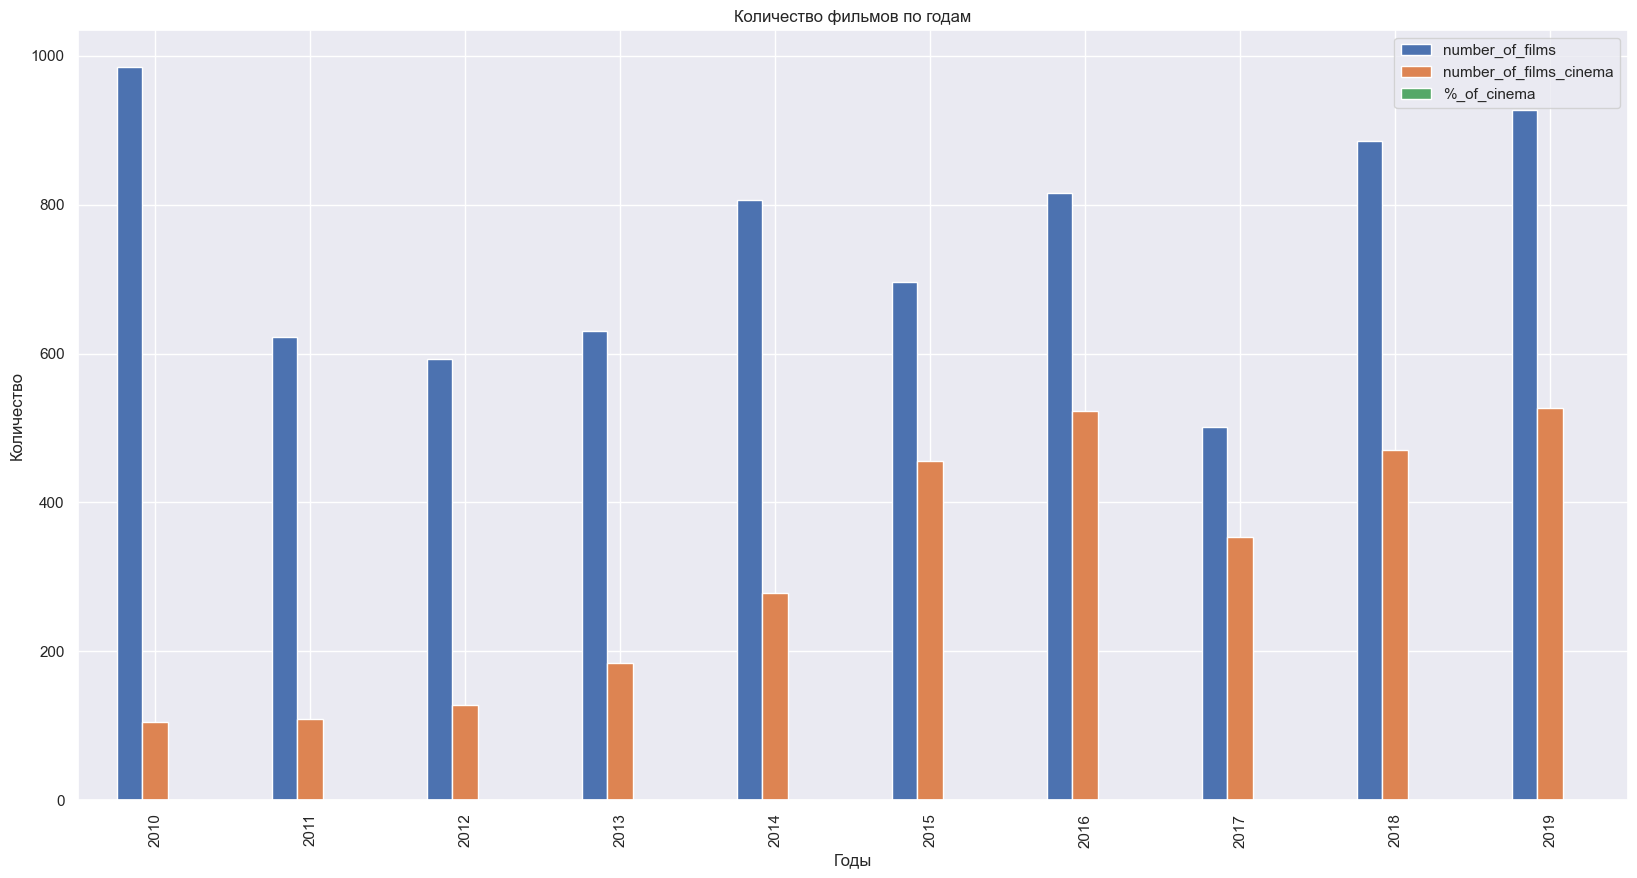

In [63]:
# Построим барчарт по данным о прокате в целом, и о прокате В КИНОТЕАТРАХ
films.plot(x='year', 
           kind='bar', 
           figsize = (20, 10), 
           grid = True, 
           title='Количество фильмов по годам',
           xlabel="Годы",
           ylabel="Количество"
          )

<Axes: title={'center': 'Доля фильмов с указанной информацией о прокате в кинотеатрах'}, xlabel='Годы', ylabel='Доли'>

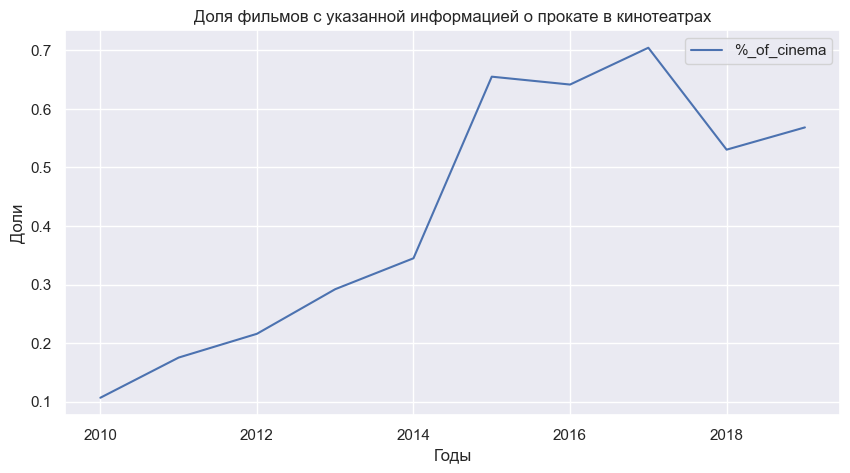

In [64]:
films.plot(x='year', 
           y='%_of_cinema', 
           figsize = (10, 5), 
           grid = True, 
           title='Доля фильмов с указанной информацией о прокате в кинотеатрах',
           xlabel="Годы",
           ylabel="Доли")

**Наблюдения** 

Данные о прокате в кинотеатрах известны не для всех фильмов, это означает, что часть фильмов получили удостоверение на прокат на ТВ. В среднем, в прокат в целом выходило около 746 фильмов в год, а в прокат В КИНОТЕАТРЫ выходило в 2 раза меньше - 313 фильмов в год. В целом, количество фильмов, выходивших в прокат стабильно, чего не скажешь про количество фильмов, выходивших в прокат В КИНОТЕАТРАХ - оно стаильно растет. 

Меньше всего фильмов вышло в прокат В КИНОТЕАТРАХ в 2010 году (это начало исследуемого периода) - всего 105 фильмов. Затем это количество постепенно увеличивалось до 523 в 2016 году. На следующий год количество фильмов упало до 353, а затем в течение еще 3 лет постепенно увеличивалось до 527 фильмов в 2019 году (это максимум). 

В целом, можно утверждать, что и количество фильмов, вышдших в прокат В КИНОТЕАТРАХ, и доля фильмов с указанной информацией о прокате в кинотеатрах стабильно растет. Это, может быть, связано со следующими факторами:

- начиная с 2014-2015 активно начали развиваться онлайн кинотеатры (типа Okko, Ivi и т.д.), благодаря чему выросло количество кассовых сборов кинотеатров;
- также благодаря цифровым технологиям даёт свои плоды многолетняя борьба с пиратством - людям проще заплатить теперь за фильм, чем пытаться найти его для росмотра на бесплатном ресурсе;
- как вариант, можно рассмотреть влияние стоимости прокатных удостоверений - возможно в последние годы стоиомость прокатного удостоверения в кинотеатры могла снизиться.

Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [66]:
# Посмотрим на величину проката за каждый год:
revenue=df.groupby('year')['box_office'].agg(['sum','count', 'mean'])
revenue

,sum,count,mean
year,,,
2010,"2,428,654.00",105,"23,130.04"
2011,"14,102,765.00",109,"129,383.17"
2012,"6,955,423.00",128,"54,339.24"
2013,"29,799,706.20",184,"161,954.92"
2014,"7,434,717,843.10",278,"26,743,589.36"
2015,"38,427,444,491.66",456,"84,270,711.60"
2016,"46,742,316,269.48",523,"89,373,453.67"
2017,"47,364,913,114.75",353,"134,178,224.12"
2018,"48,674,622,551.95",470,"103,563,026.71"


Text(0, 0.5, 'Кассовые сборы, млрд руб')

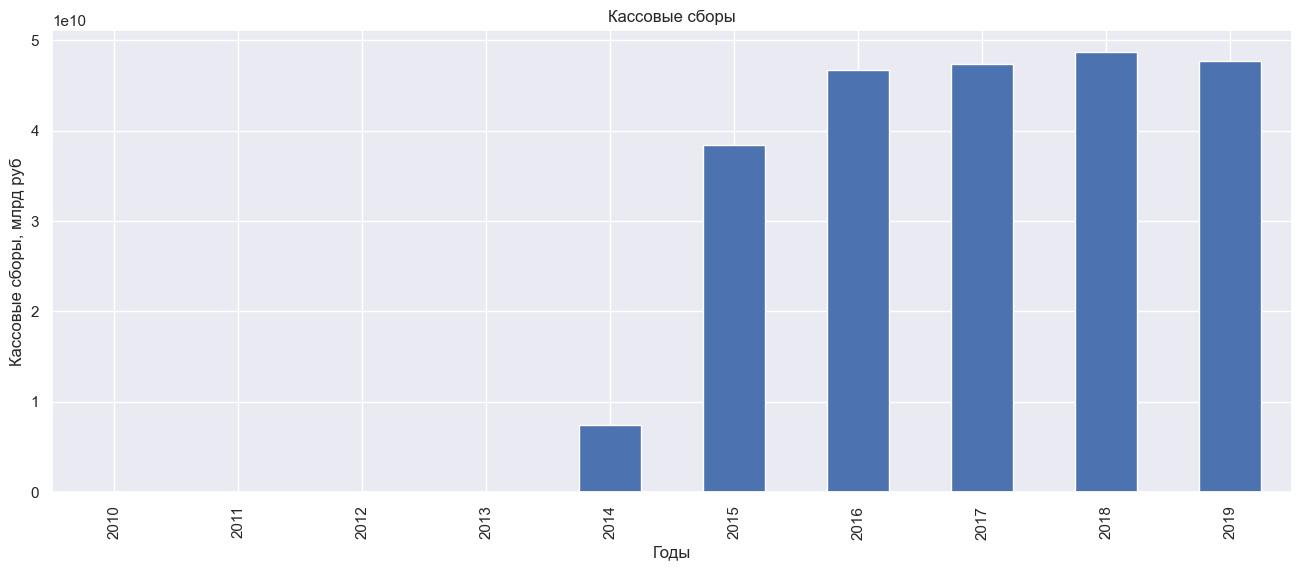

In [67]:
# Посторим  график, отражающий зависимость между величиной кассовых сборов и годом:
revenue['sum'].plot(kind='bar', grid=True)
plt.title('Кассовые сборы')
plt.xlabel('Годы')
plt.ylabel('Кассовые сборы, млрд руб')

**Наблюдения** 

С каждым годом объем кассовых сборов только увеличивается. 
Минимальная общая сумма кассовых сборов составила 2,4 млн руб - это было в 2010 году. 
Максимальная сумма составила 201,8 трлн руб - это было в 2018 году.

Причем в 2018 (475 фильмов из 889) сведений о кассовых сборах по фильмам было в 4,5 раза больше, чем в 2010 (105 фильмов). Но рост в объеме кассовых сборов несопоставим с ростом количества фильмов. Это означает, что растёт именно средняя величина кассовых сборов по фильмам.

В 2010 средние сборы за фильм составили 23 тыс руб. Эта цифра наверняка не отражает действительность. Для интереса посмотрим, какие максимальные сборы были у самых успешных фильмов:

In [68]:
# Посмотрим, какие фильмы собрали максимальные сборы в 2010:
revenue_data=df.pivot_table(index=['title', 'year'], values='box_office', aggfunc='sum')
revenue_data.query('year==2010').sort_values(by='box_office', ascending=False).head()

,,box_office
title,year,
Морские динозавры 3D: Путешествие в доисторический мир,2010,"1,446,400.00"
Хаббл 3D,2010,"245,630.00"
Братья .,2010,"168,411.00"
Стоун,2010,"54,060.00"
Три богатыря и Шамаханская царица,2010,"45,225.00"


**Наблюдение**

Cогласно данным в 2010 максимальные сборы имели следующие фильмы:

- фильм "Морские динозавры 3D" - сборы составили 1,4 млн руб;
- фильм "Хаббл 3D" - собрано 246 тыс руб;
- фильм "Братья" - сборы составили 168 тыс руб;
- фильм "Стоун" - сбора составили 54 тыс руб;
- фильм "Три богатыря и Шамаханская царица" - собрано всего 45 тыс руб.

Данные показатели выглядят неправдоподобно низкими для сборов фильма. Скорее всего, при выгрузке данных была перепутана валюта, или разряд цифр.

Посчитаем среднюю и медианную сумму сборов для каждого года.

,mean,median
,box_office,box_office
year,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,339.24","5,660.00"
2013,"161,954.92","3,522.50"
2014,"26,743,589.36","18,137.50"
2015,"84,270,711.60","4,742,671.67"
2016,"89,373,453.67","3,776,087.56"
2017,"134,178,224.12","9,876,765.00"


Text(0, 0.5, 'Кассовые сборы')

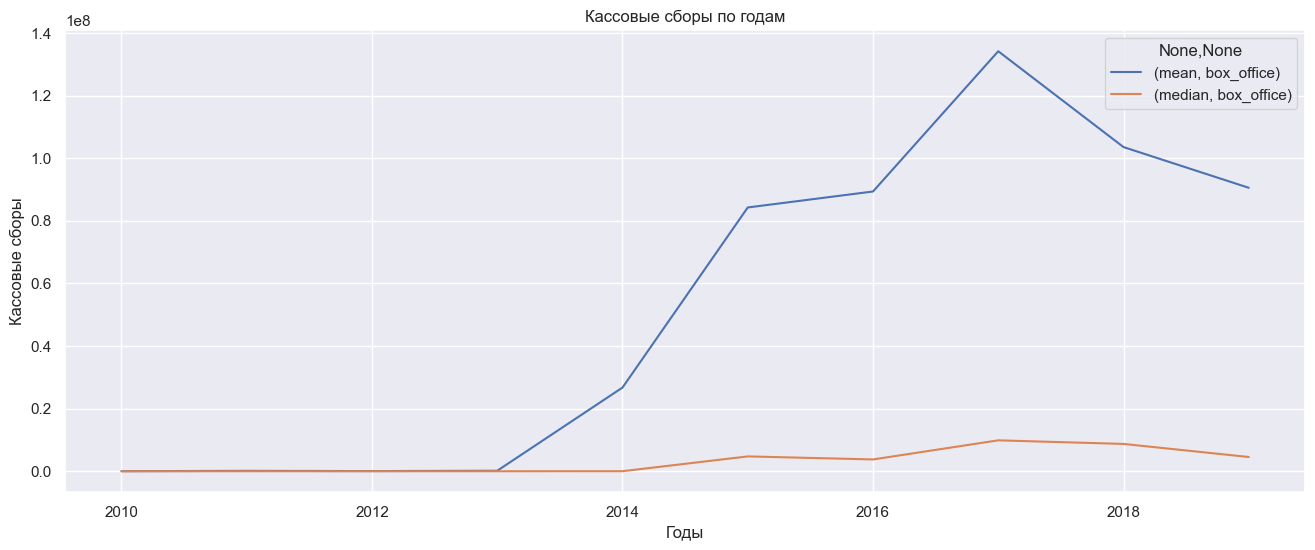

In [69]:
box_office_year=df.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
display(box_office_year)
box_office_year.plot(grid=True)
plt.title('Кассовые сборы по годам')
plt.xlabel('Годы')
plt.ylabel('Кассовые сборы')

**Наблюдение**


Медиана по кассовым сборам во много раз меньше среднего каждый год. Это свидетельствует о том, что есть некоторое количество фильмов с очень значительными сборами, что повлияло на среднююю величину.

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

age_restriction
«0+» - для любой зрительской аудитории      809,077,425.97
«12+» - для детей старше 12 лет          59,015,527,877.20
«16+» - для детей старше 16 лет          75,037,781,828.46
«18+» - запрещено для детей              40,757,657,833.61
«6+» - для детей старше 6 лет            53,312,834,468.74
Name: box_office, dtype: float64

Text(0, 0.5, 'Кассовые сборы')

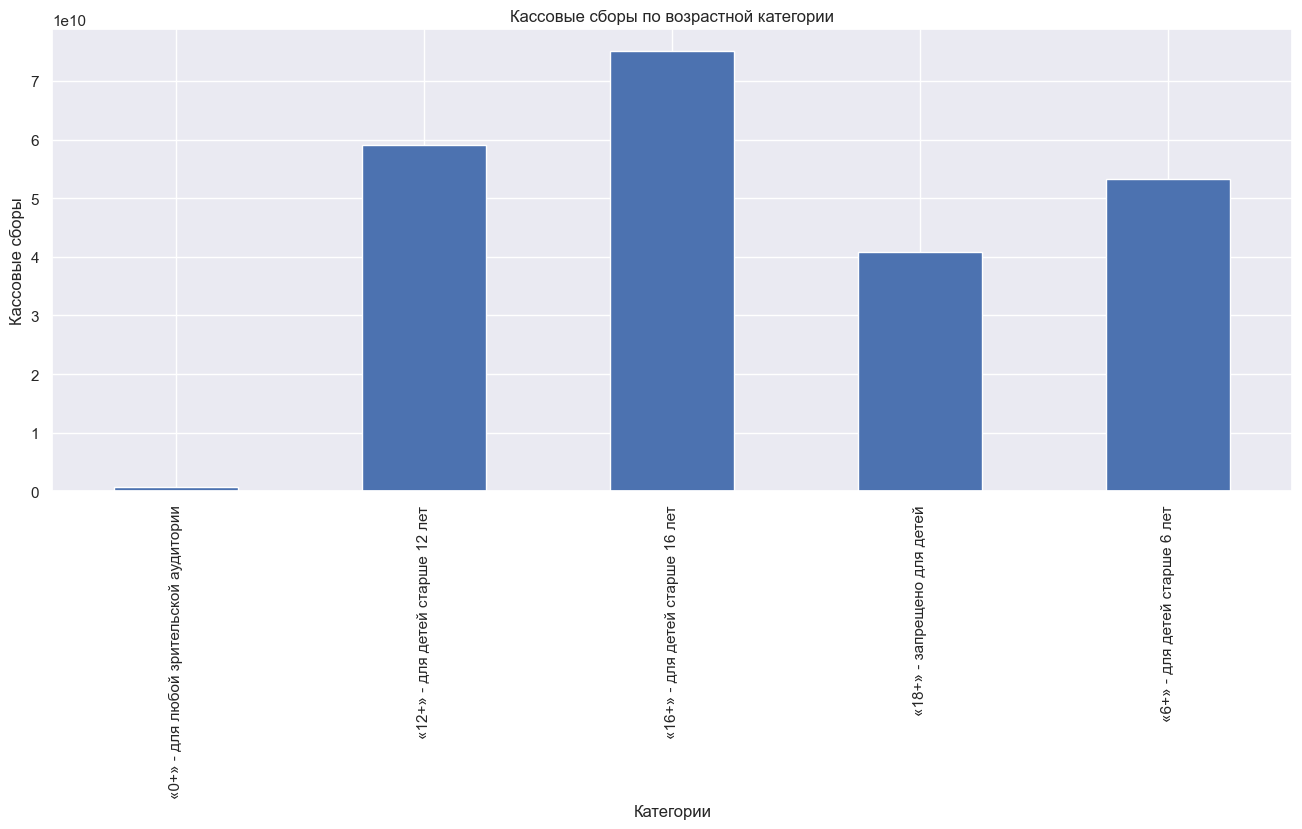

In [72]:
# Определеим сумму кассовых сборов по возрастным ограничениям за период с 2015-2019:
age_restriction_data=df.query('year>2014').groupby('age_restriction')['box_office'].sum()
display(age_restriction_data)
age_restriction_data.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Категории')
plt.ylabel('Кассовые сборы')

age_restriction
«0+» - для любой зрительской аудитории      379,054,578.37
«12+» - для детей старше 12 лет          13,399,855,044.21
«16+» - для детей старше 16 лет          10,770,566,168.07
«18+» - запрещено для детей               5,430,350,628.93
«6+» - для детей старше 6 лет             8,447,618,072.08
Name: box_office, dtype: float64

Text(0, 0.5, 'Кассовые сборы')

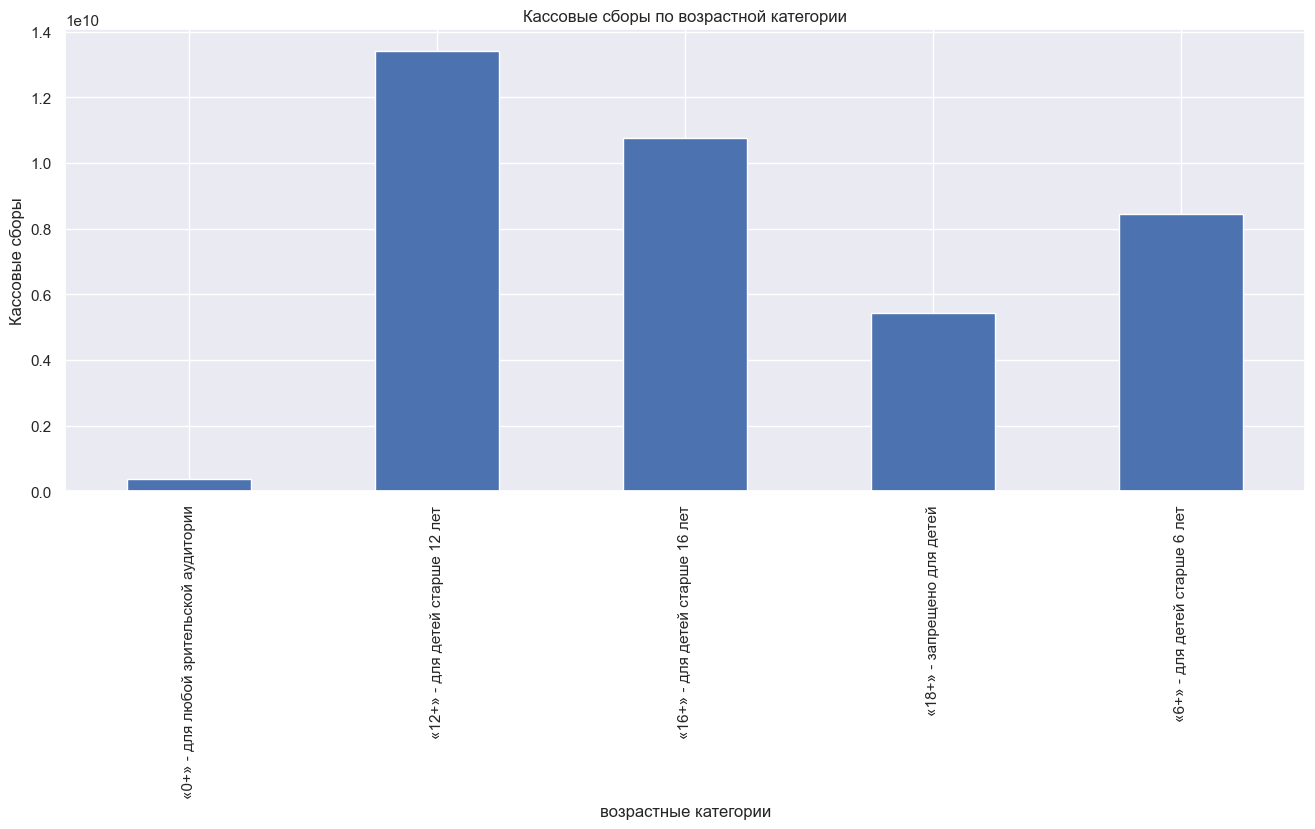

In [73]:
age_restriction_2015=df.query('year==2015').groupby('age_restriction')['box_office'].sum()
display(age_restriction_2015)
age_restriction_2015.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('возрастные категории')
plt.ylabel('Кассовые сборы')

age_restriction
«0+» - для любой зрительской аудитории      150,228,848.67
«12+» - для детей старше 12 лет          11,150,762,103.96
«16+» - для детей старше 16 лет          16,594,249,489.74
«18+» - запрещено для детей               6,793,929,818.87
«6+» - для детей старше 6 лет            12,053,146,008.24
Name: box_office, dtype: float64

Text(0, 0.5, 'Кассовые сборы')

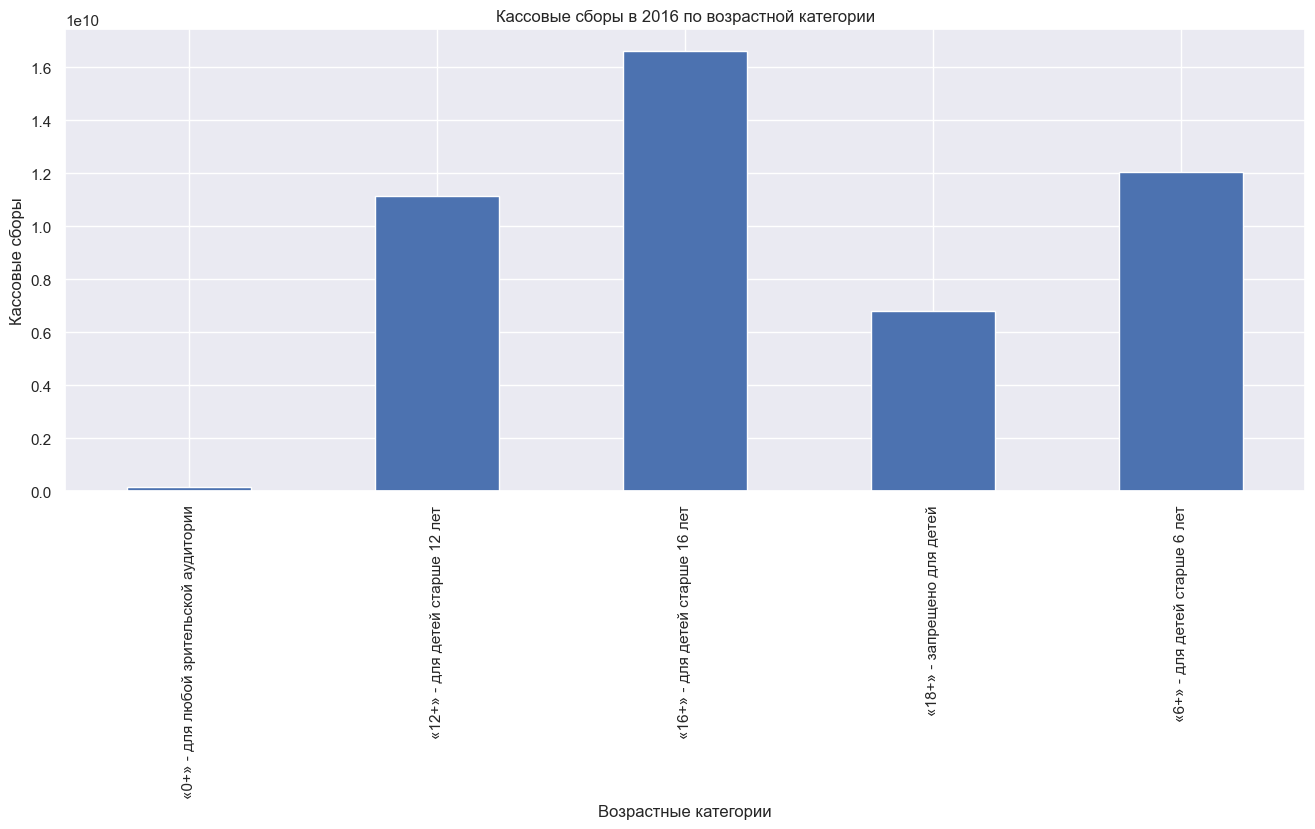

In [74]:
age_restriction_2016=df.query('year==2016').groupby('age_restriction')['box_office'].sum()
display(age_restriction_2016)
age_restriction_2016.plot(kind='bar', grid=True)
plt.title('Кассовые сборы в 2016 по возрастной категории')
plt.xlabel('Возрастные категории')
plt.ylabel('Кассовые сборы')

age_restriction
«0+» - для любой зрительской аудитории      229,598,930.00
«12+» - для детей старше 12 лет           7,517,420,294.67
«16+» - для детей старше 16 лет          18,694,590,951.06
«18+» - запрещено для детей               9,651,495,581.02
«6+» - для детей старше 6 лет            11,271,807,358.00
Name: box_office, dtype: float64

Text(0, 0.5, 'Кассовые сборы')

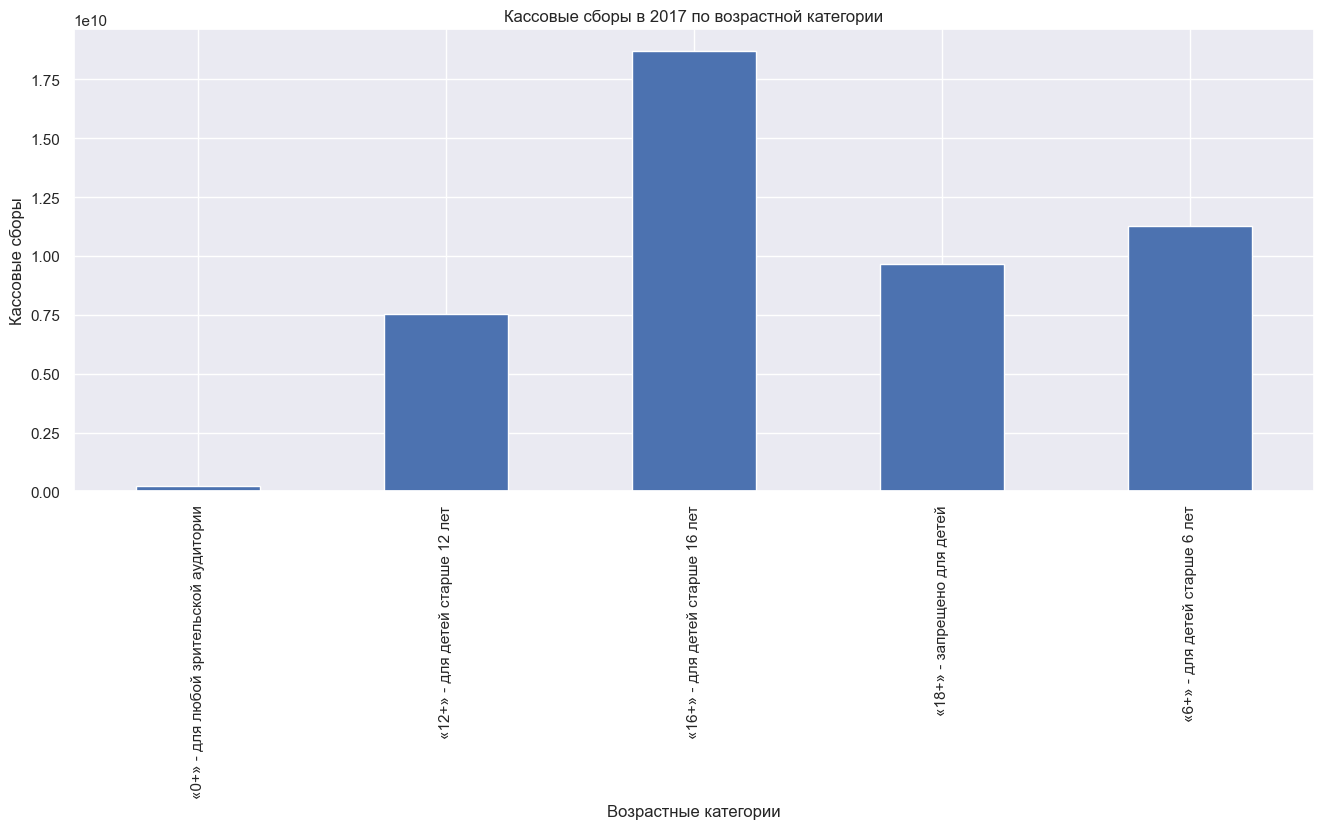

In [75]:
age_restriction_2017=df.query('year==2017').groupby('age_restriction')['box_office'].sum()
display(age_restriction_2017)
age_restriction_2017.plot(kind='bar', grid=True)
plt.title('Кассовые сборы в 2017 по возрастной категории')
plt.xlabel('Возрастные категории')
plt.ylabel('Кассовые сборы')

age_restriction
«0+» - для любой зрительской аудитории       32,449,002.11
«12+» - для детей старше 12 лет          14,267,291,660.69
«16+» - для детей старше 16 лет          16,278,405,946.93
«18+» - запрещено для детей               8,760,085,501.15
«6+» - для детей старше 6 лет             9,336,390,441.07
Name: box_office, dtype: float64

Text(0, 0.5, 'Кассовые сборы')

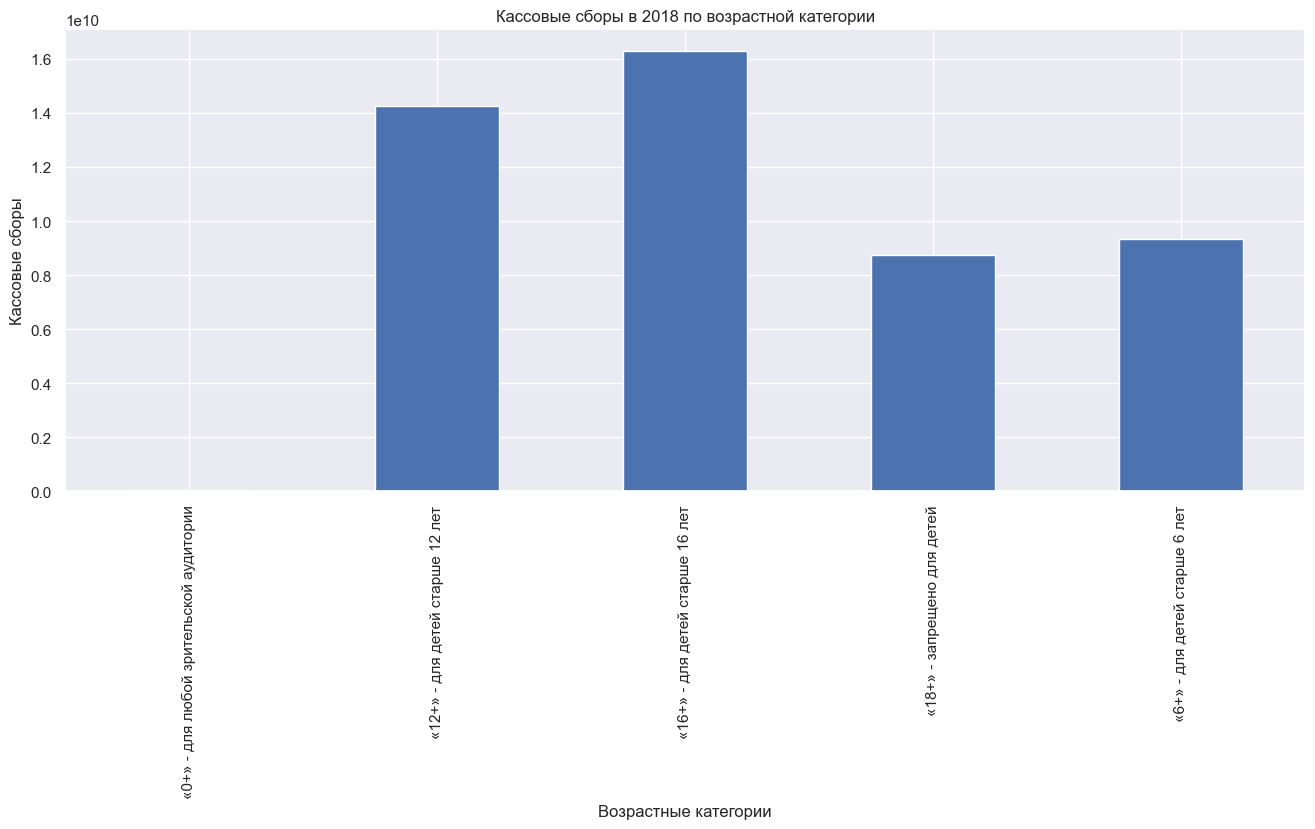

In [76]:
age_restriction_2018=df.query('year==2018').groupby('age_restriction')['box_office'].sum()
display(age_restriction_2018)
age_restriction_2018.plot(kind='bar', grid=True)
plt.title('Кассовые сборы в 2018 по возрастной категории')
plt.xlabel('Возрастные категории')
plt.ylabel('Кассовые сборы')

age_restriction
«0+» - для любой зрительской аудитории       17,746,066.82
«12+» - для детей старше 12 лет          12,680,198,773.67
«16+» - для детей старше 16 лет          12,699,969,272.66
«18+» - запрещено для детей              10,121,796,303.64
«6+» - для детей старше 6 лет            12,203,872,589.35
Name: box_office, dtype: float64

Text(0, 0.5, 'Кассовые сборы')

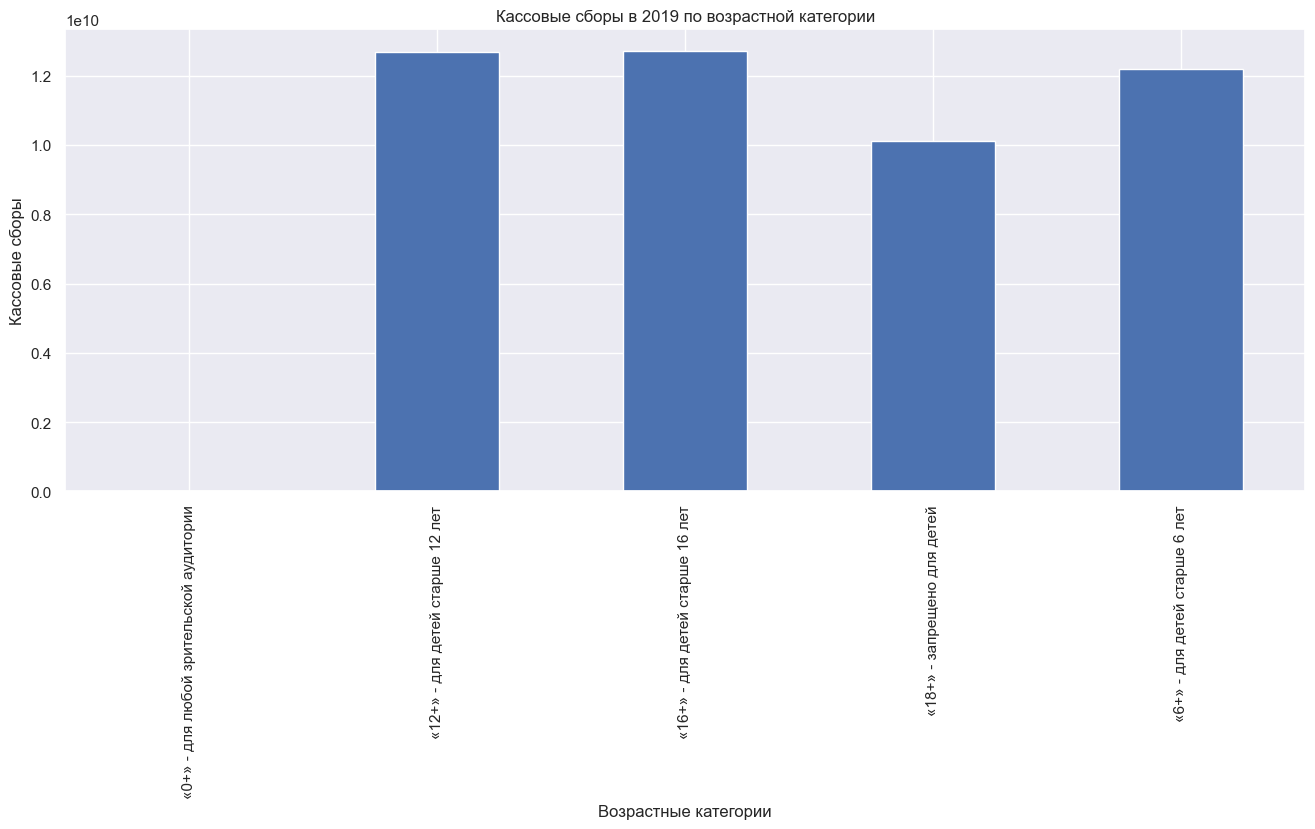

In [77]:
age_restriction_2019=df.query('year==2019').groupby('age_restriction')['box_office'].sum()
display(age_restriction_2019)
age_restriction_2019.plot(kind='bar', grid=True)
plt.title('Кассовые сборы в 2019 по возрастной категории')
plt.xlabel('Возрастные категории')
plt.ylabel('Кассовые сборы')

**Наблюдение** 

За период с 2015-2019 больше всего кассовых сборов собрали фильмы категории 16+, далее идут фильмы категорий 12+ и 6+, затем идут фильмы категории 18+, а фильмы категории 0+ принесли меньше всего выручки. Анализ кассовых сборов по годам показал следующее:

- 2015: наибольшие кассовые сборы показали фильмы 12+, затем идут фильмы категории 16+ и 6+.
- 2016: начиная с этого года фильмы категории 16+ будут всегда занимать первое место по кассовым сборам, затем идут фильмы 12+ и 6+ с одинаковыми показателями.
- 2017: фильмы категории 12+ впервые уступили место фильмам 18+.
- 2018: фильмы 12+ заняли второе место, а третье место досталось фильмам категории 6+.
- 2019: почти равномерно распределились фильмы категорий 6+/12+/16+, ненамного отстают от них фильмы 18+.

Можно утверждать, что есть некоторая закономерность между возрастной категорией и кассовыми сборами. Например, фильмы категории 0+ почти не имеют значительных сборов. Также фильмы категории 18+ пости всегда приносят меньше сборов, чем фильмы категорий 6+/12+/16+. Это, вероятно, связано с тем, что их смотрят только совершеннолетние люди, а на фильмы категорий 6+/12+/16+ родители приходят вместе с детьми, или возможно связано с тем, что основной потребитель киноиндустрии это несовершеннолетняя молодежь.

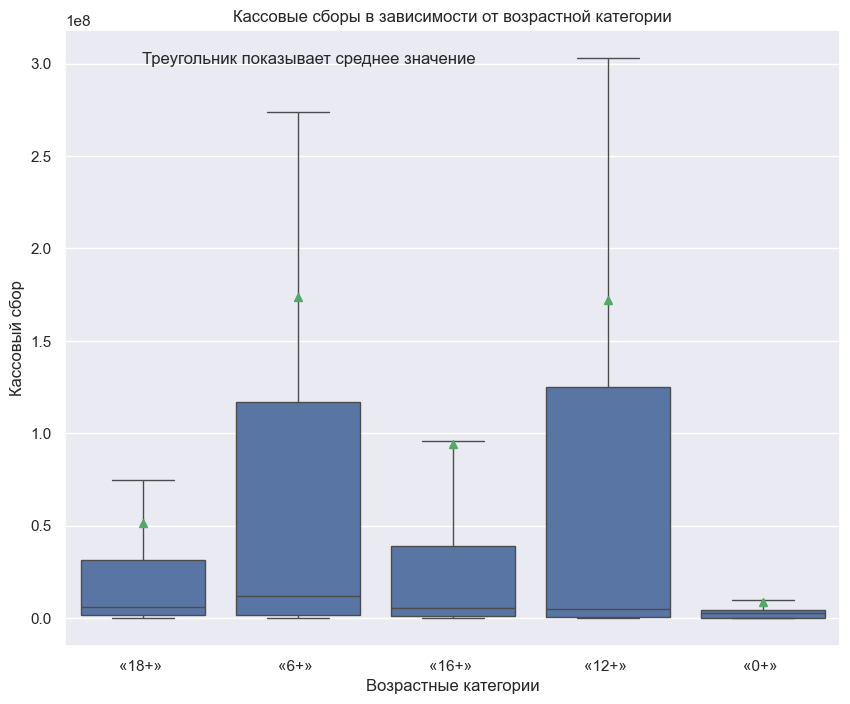

In [78]:
temp = df.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = (temp['year'] >= 2015) & (temp['year'] <= 2019)

plt.figure(figsize=(10, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.0e8,'Треугольник показывает среднее значение')
plt.show()

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

Поищем интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино.
Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [79]:
# Создадим таблицу с данными по фильмам с гос.поддержкой:
support_data=df.query('nonrefundable_support>=0')
display(support_data.head(50))
print('Кол-во прокатных удостоверний у фильмов с гос.поддержкой:', 
      len(support_data['pu_number']),
        ', Кол-во фильмов с гос.поддержкой:', len(support_data['title'].unique()))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,box_office,year,director_first,genres_first,country_first,total_support,%_total_support,%_refundable_support,%_nonrefundable_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,Россия,"26,500,000.00",0.33,0.00,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,неизвестно,"28,140.00",2014,А.Якимчук,неизвестно,Россия,"26,000,000.00",0.70,0.00,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,Россия,"107,847,945.00",0.61,0.00,0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,Россия,"28,000,000.00",0.69,0.00,0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,драма,"232,100.00",2014,М.Угаров,драма,Россия,"25,000,000.00",0.62,0.00,0.62
1854,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,...,"мультфильм,фэнтези,история","15,078,858.60",2015,С.Серегин,мультфильм,Россия,"25,000,000.00",0.48,0.00,0.48
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,неизвестно,«12+» - для детей старше 12 лет,"50,000,000.00",...,"драма,военный,история","249,166,767.70",2015,Р.Давлетьяров,драма,Россия,"150,000,000.00",0.68,0.23,0.45
1871,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия,Франция,Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.00,...,драма,"4,731,239.50",2014,В.Глаголева,драма,Россия,"46,502,299.00",0.54,0.00,0.54
1903,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.00,...,"триллер,боевик,приключения","352,804,320.40",2015,А.Войтинский,триллер,Россия,"75,000,000.00",0.54,0.00,0.54
1912,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.00,...,"фэнтези,приключения,драма","51,907.50",2015,Д.Федоров,фэнтези,Россия,"34,000,000.00",0.70,0.00,0.70


Кол-во прокатных удостоверний у фильмов с гос.поддержкой: 307 , Кол-во фильмов с гос.поддержкой: 307


In [80]:
# Создадим таблицу с данными по фильмам без гос.поддержки:
no_support_data=df.query('nonrefundable_support.isnull() == True')
print('Кол-во прокатных удостоверний у фильмов без гос.поддержки:', 
      len(no_support_data['pu_number']),
        ', Кол-во фильмов без гос.поддержки:', 
      len(no_support_data['title'].unique()))

Кол-во прокатных удостоверний у фильмов без гос.поддержки: 7154 , Кол-во фильмов без гос.поддержки: 6445


In [81]:
# Посчитаем, сколько выделяется средств на поддержку кино за весь период:
display(support_data['total_support'].describe())
print('Суммарная гос.поддержка за весь период: %.0f' % support_data['total_support'].sum())

count           307.00
mean     59,771,071.16
std      73,872,664.01
min       3,000,000.00
25%      25,100,000.00
50%      35,000,000.00
75%      60,000,000.00
max     500,000,000.00
Name: total_support, dtype: float64

Суммарная гос.поддержка за весь период: 18349718847


In [82]:
# Посчитаем, как распределилась гос.поддержка по годам:
support_pivot=support_data.groupby('year')['total_support'].agg(['sum','count', 'median'])
support_pivot

,sum,count,median
year,,,
2013,"134,347,945.00",2,"67,173,972.50"
2014,"549,002,299.00",15,"28,000,000.00"
2015,"3,118,241,459.00",77,"30,000,000.00"
2016,"3,977,155,482.00",58,"35,000,000.00"
2017,"2,998,971,662.00",37,"37,346,881.00"
2018,"2,983,000,000.00",51,"35,000,000.00"
2019,"4,589,000,000.00",67,"40,000,000.00"


Text(0, 0.5, 'Сумма гос.поддержки, млрд руб')

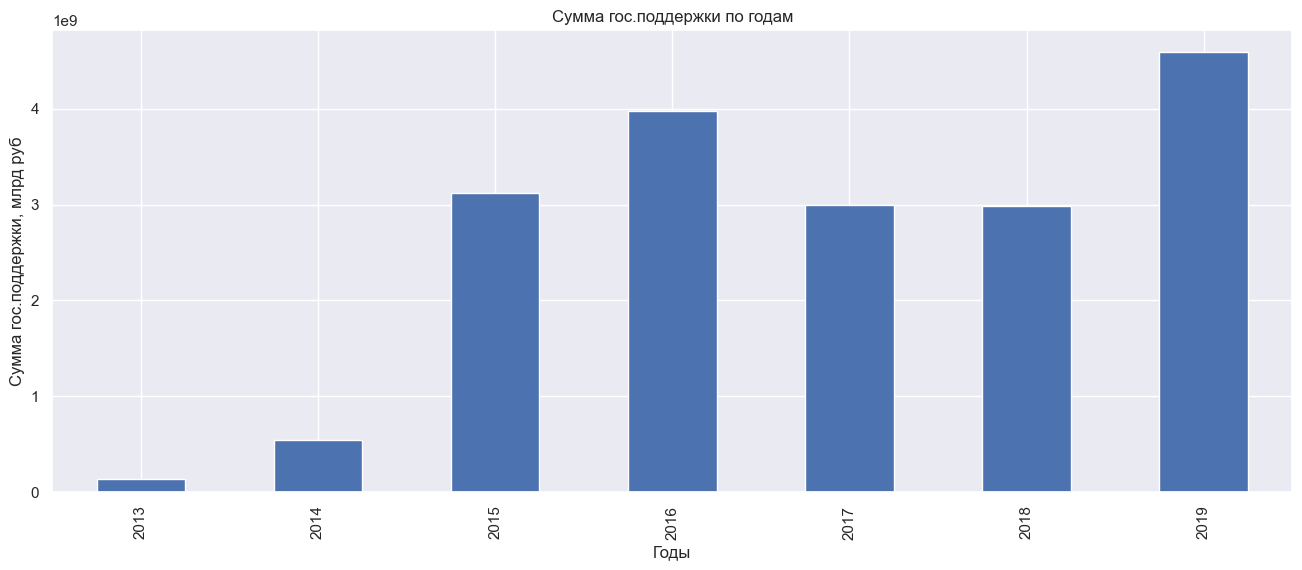

In [83]:
# Посторим  график, отражающий зависимость между величиной гос.поддержки и годом:
support_pivot['sum'].plot(kind='bar', grid=True)
plt.title('Сумма гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Сумма гос.поддержки, млрд руб')

Text(0, 0.5, 'Количество фильмов')

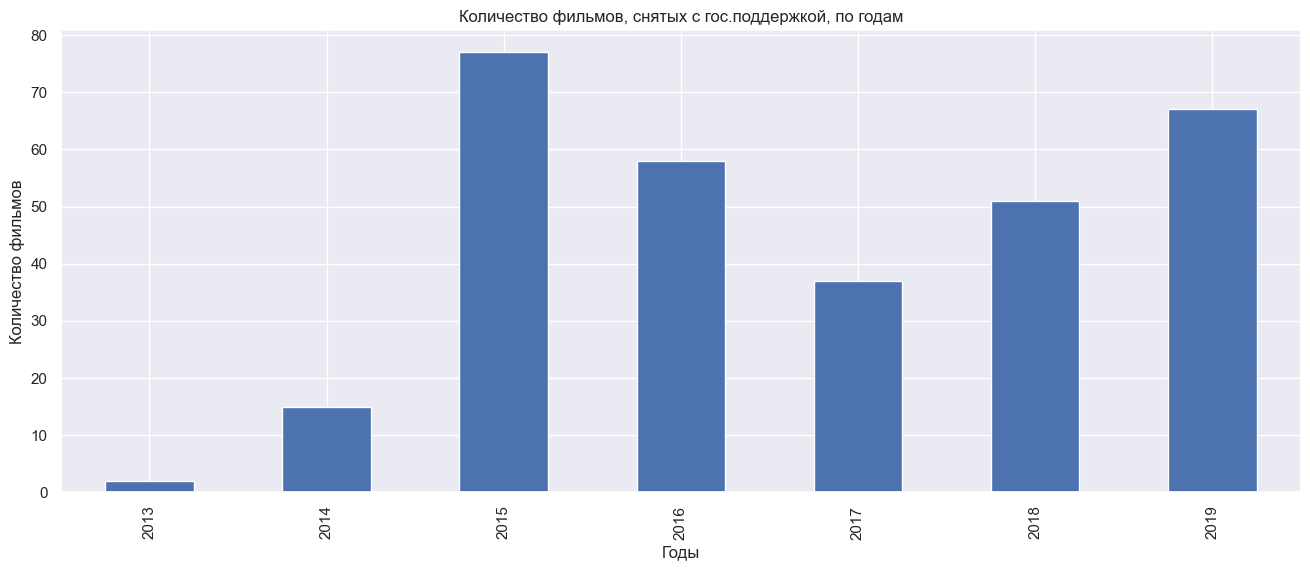

In [84]:
# Посторим  график, отражающий зависимость между количеством фильмов, снятых с гос.поддержкой и годом:
support_pivot['count'].plot(kind='bar', grid=True)
plt.title('Количество фильмов, снятых с гос.поддержкой, по годам')
plt.xlabel('Годы')
plt.ylabel('Количество фильмов')

Text(0, 0.5, 'Медианная сумма гос.поддержки, десятки млн руб')

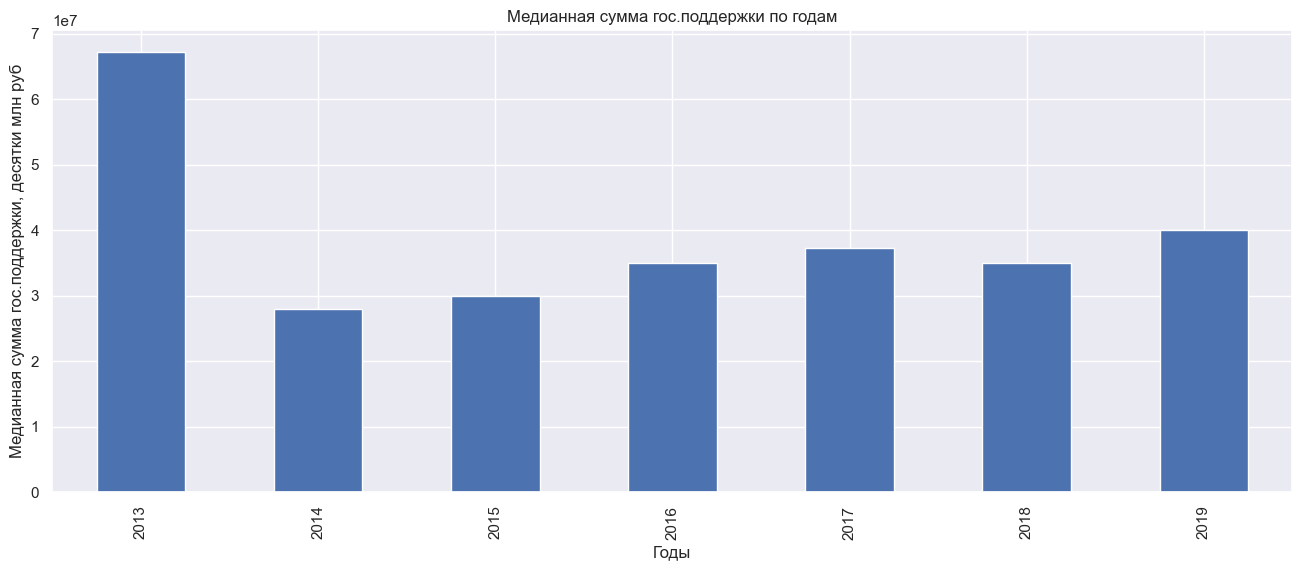

In [85]:
# Посторим  график, отражающий зависимость между медианной величиной гос.поддержки и годом:
support_pivot['median'].plot(kind='bar', grid=True)
plt.title('Медианная сумма гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Медианная сумма гос.поддержки, десятки млн руб')

In [86]:
# Выведем, фильмы, выпущенные в прокат в 2013 году:
support_data.query('year==2013')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,box_office,year,director_first,genres_first,country_first,total_support,%_total_support,%_refundable_support,%_nonrefundable_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,Россия,"26,500,000.00",0.33,0.00,0.33
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,Россия,"107,847,945.00",0.61,0.00,0.61


year
2013   107,847,945.00
2014    90,000,000.00
2015   250,000,000.00
2016   450,000,000.00
2017   400,000,000.00
2018   260,000,000.00
2019   500,000,000.00
Name: total_support, dtype: float64

Text(0, 0.5, 'Максимальная сумма гос.поддержки, млн руб')

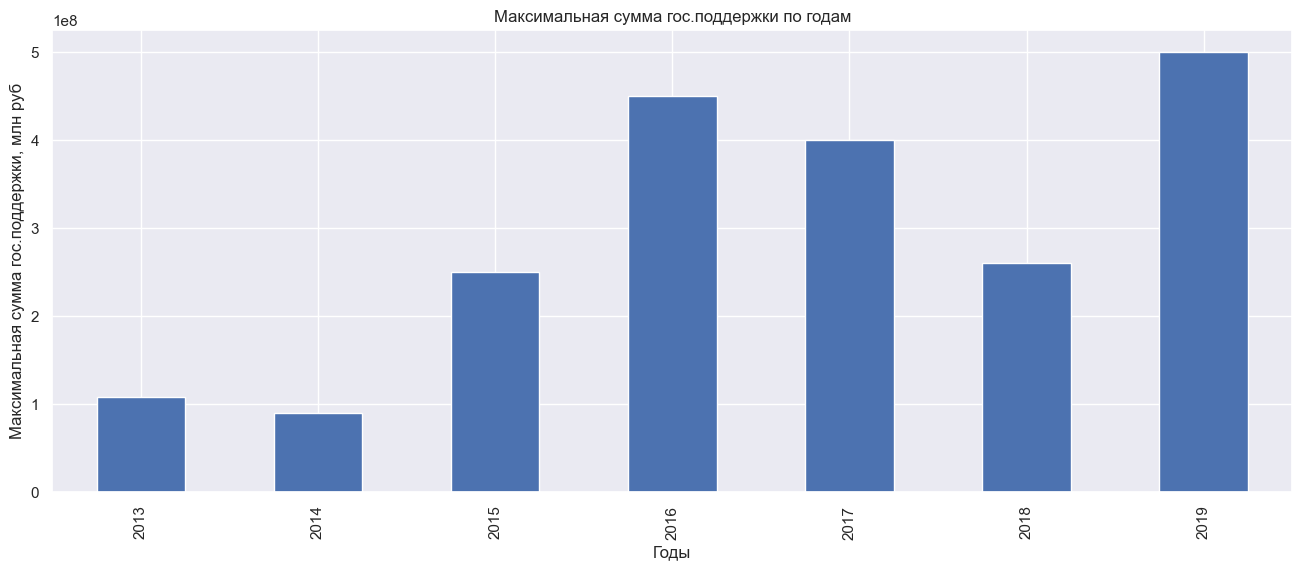

In [87]:
max_support=support_data.groupby('year')['total_support'].agg('max')
display(max_support)

max_support.plot(kind='bar', grid=True)
plt.title('Максимальная сумма гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Максимальная сумма гос.поддержки, млн руб')

In [88]:
# Мы помним, что есть несколько строк с пропущенными значениями budget и box_office  
# - удалим их для чистоты сравнения:
net_support_data=support_data.dropna(subset=['budget', 'box_office'])

# Посчитаем, каков совокупный бюджет фильмов с гос.поддержкой:
print('Суммарный бюджет фильмов с гос.поддержкой за весь период: %.0f' % net_support_data['budget'].sum())
print('Суммарные кассовые сборы фильмов с гос.поддержкой за весь период: %.0f' % net_support_data['box_office'].sum())

Суммарный бюджет фильмов с гос.поддержкой за весь период: 39280394141
Суммарные кассовые сборы фильмов с гос.поддержкой за весь период: 37014670923


In [96]:
# Группировка
net_support_pivot = (
    net_support_data
    .groupby('year')[['box_office', 'budget']]  # СПИСОК, а не кортеж!
    .agg(['sum', 'count', 'median'])
)

# Вычислим "итог": сборы минус бюджет
net_support_pivot[('result', 'sum')] = (
    net_support_pivot[('box_office', 'sum')] - net_support_pivot[('budget', 'sum')]
)

# Упорядочим колонки (по смыслу)
ordered_cols = [
    ('box_office', 'sum'), ('budget', 'sum'), ('result', 'sum'),
    ('box_office', 'count'), ('budget', 'count'),
    ('box_office', 'median'), ('budget', 'median')
]
net_support_pivot = net_support_pivot[ordered_cols]

# Вывод
net_support_pivot


,box_office,budget,result,box_office,budget,box_office,budget
,sum,sum,sum,count,count,median,median
year,,,,,,,
2013,"20,322,385.10","255,435,390.00","-235,113,004.90",2,2,"10,161,192.55","127,717,695.00"
2014,"1,007,188,150.50","1,279,484,783.00","-272,296,632.50",15,15,"4,731,239.50","70,876,172.00"
2015,"4,715,364,713.40","6,731,185,263.00","-2,015,820,549.60",76,76,"3,538,064.75","55,567,193.50"
2016,"4,957,724,366.67","7,210,236,668.00","-2,252,512,301.33",57,57,"16,814,329.46","69,883,049.00"
2017,"9,666,281,198.20","6,529,477,775.00","3,136,803,423.20",35,35,"30,156,174.04","80,000,000.00"
2018,"8,940,288,427.88","6,466,193,929.00","2,474,094,498.88",51,51,"22,730,244.88","93,000,000.00"
2019,"7,707,501,681.18","10,808,380,333.00","-3,100,878,651.82",57,57,"18,878,460.81","80,000,000.00"


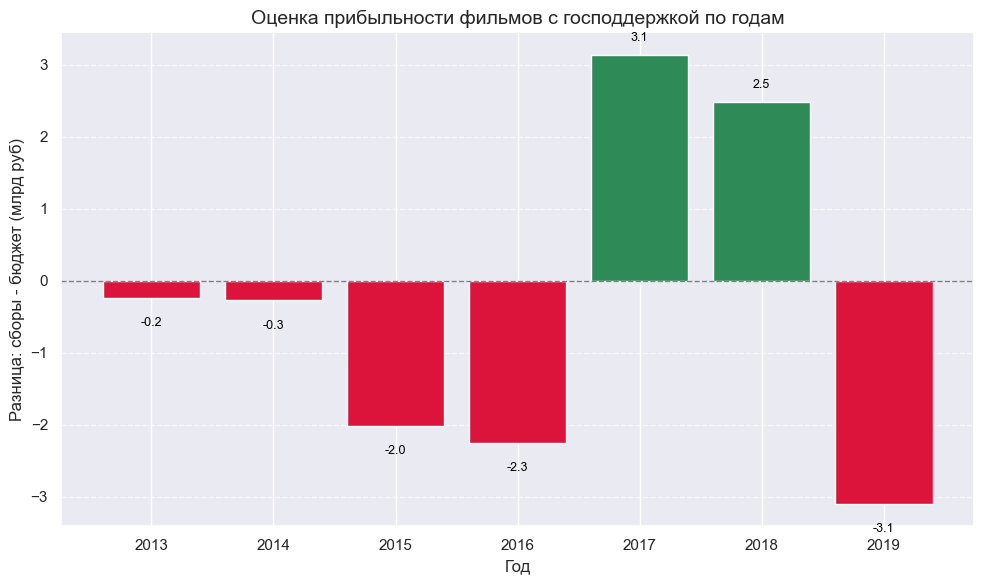

In [97]:
# Посторим  график, отражающий прибыльность фильмов с гос.поддержкой по годам:

# Подготовка данных: переведём результат в миллиарды
result_billion = net_support_pivot[('result', 'sum')] / 1e9

# Построение
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(result_billion.index, result_billion, color=['crimson' if val < 0 else 'seagreen' for val in result_billion])

# Подписи значений на столбиках
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 8 if height > 0 else -14),
                textcoords='offset points',
                ha='center', va='bottom' if height > 0 else 'top',
                fontsize=9, color='black')

# Оформление
ax.set_title('Оценка прибыльности фильмов с господдержкой по годам', fontsize=14)
ax.set_xlabel('Год')
ax.set_ylabel('Разница: сборы - бюджет (млрд руб)')
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

🎬 Рейтинги фильмов с гос.поддержкой:


count   290.00
mean      6.03
std       1.13
min       1.00
25%       5.40
50%       6.20
75%       6.70
max       8.50
Name: ratings, dtype: float64


🎬 Рейтинги фильмов БЕЗ гос.поддержки:


count   6,176.00
mean        6.50
std         1.10
min         1.10
25%         5.90
50%         6.60
75%         7.30
max         9.20
Name: ratings, dtype: float64

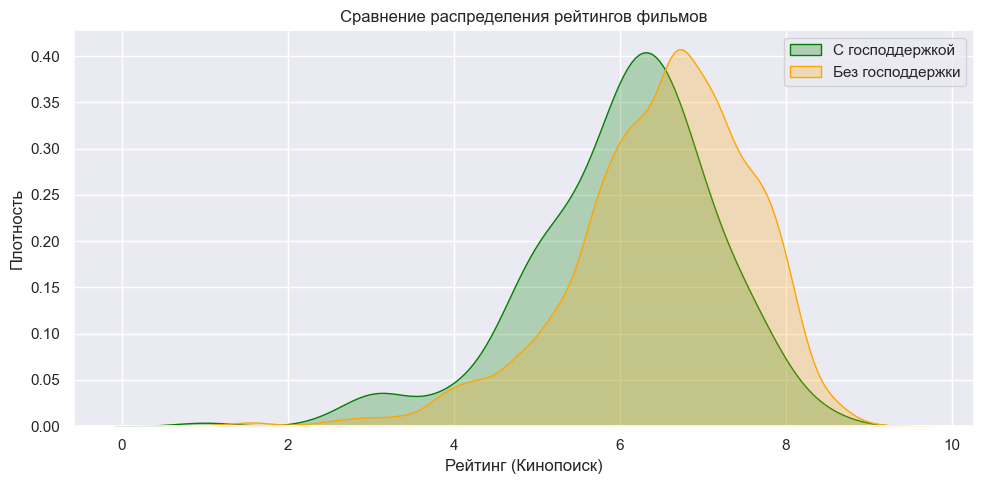

In [99]:
# Описательная статистика
print("🎬 Рейтинги фильмов с гос.поддержкой:")
display(support_data['ratings'].describe())

print("\n🎬 Рейтинги фильмов БЕЗ гос.поддержки:")
display(no_support_data['ratings'].describe())

# Визуализация распределений
plt.figure(figsize=(10, 5))
sns.kdeplot(support_data['ratings'].dropna(), label='С господдержкой', fill=True, color='green')
sns.kdeplot(no_support_data['ratings'].dropna(), label='Без господдержки', fill=True, color='orange')
plt.title('Сравнение распределения рейтингов фильмов')
plt.xlabel('Рейтинг (Кинопоиск)')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**🎬 Сравнение рейтингов фильмов с господдержкой и без неё**

На основе описательной статистики и графика распределения рейтингов можно сделать следующие выводы:

1. **Средний рейтинг фильмов с господдержкой ниже**  
   - Средний рейтинг: **6.03** (с поддержкой) против **6.50** (без поддержки)  
   - Медианный рейтинг: **6.20** против **6.60**

2. **Фильмы с господдержкой чаще получают низкие оценки**  
   - Распределение шире и сдвинуто влево.  
   - Много фильмов с рейтингом от **3 до 5**.

3. **Фильмы без господдержки получают более высокие и стабильные оценки**  
   - Распределение более узкое и сфокусировано в диапазоне **6.5–7.5**.  
   - Плотность максимальна около **7.0**, что говорит о высокой популярности у зрителей.

4. **Гипотезы для интерпретации**  
   - Господдержку получают часто **немассовые проекты**: исторические, авторские, социальные.  
   - Фильмы без поддержки ориентированы на зрителя и **вынуждены конкурировать за внимание**.  
   - Возможен **пересмотр критериев господдержки** с акцентом на качество и востребованность.

📌 Дополнительно рекомендуется провести **статистическую проверку** различий (например, Mann–Whitney U-тест), чтобы подтвердить значимость наблюдаемых эффектов.


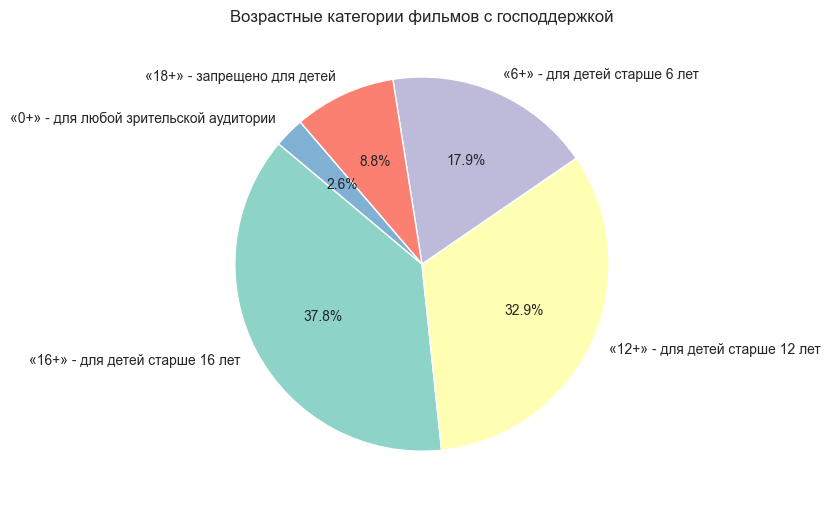

In [117]:
# Посмотрим, для каких возрастных категорий снимают фильмы C гос.поддержкой:

age_counts = support_data['age_restriction'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'w'}, textprops={'fontsize': 10},
        colors=plt.get_cmap('Set3').colors)
plt.title('Возрастные категории фильмов с господдержкой', fontsize=12)
plt.tight_layout()
plt.show()


**🎬 Возрастные категории фильмов с господдержкой**

Наиболее часто господдержку получают фильмы с возрастным ограничением:

- **«16+»** — для детей старше 16 лет
- **«12+»** — для детей старше 12 лет

На эти две категории приходится более **60% всех фильмов**. Это указывает на акцент господдержки на подростково-взрослую аудиторию.

Фильмы категории **«0+»** и **«6+»** встречаются реже, что может говорить о недостаточном внимании к контенту для младшей аудитории.

Также около **10%** фильмов — категории **«18+»**, что свидетельствует о поддержке более серьёзных, в том числе социальных и исторических тем.

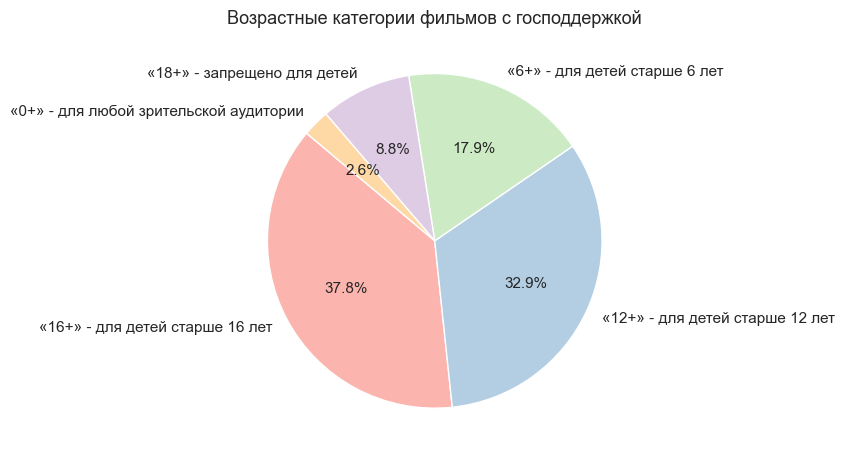

In [114]:
# Посмотрим, для каких возрастных категорий снимают фильмы БЕЗ гос.поддержки:

counts = support_data['age_restriction'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140,
        colors=plt.get_cmap('Pastel1').colors, 
        textprops={'fontsize': 11}, wedgeprops={'edgecolor': 'white'})
plt.title('Возрастные категории фильмов с господдержкой', fontsize=13)
plt.tight_layout()
plt.show()


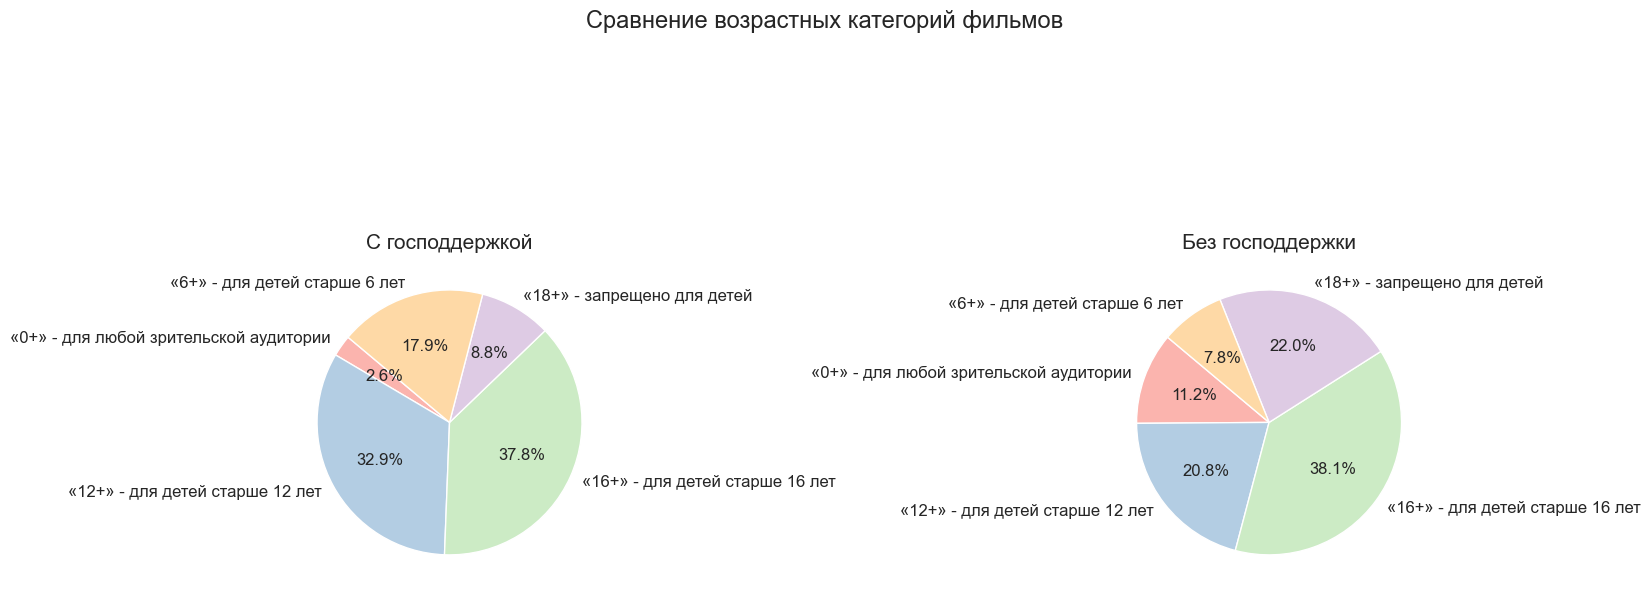

In [122]:
# Распределения
support_age = support_data['age_restriction'].value_counts(normalize=True).sort_index()
no_support_age = no_support_data['age_restriction'].value_counts(normalize=True).sort_index()

# Единый порядок
all_ages = sorted(set(support_age.index) | set(no_support_age.index))
support_age = support_age.reindex(all_ages, fill_value=0)
no_support_age = no_support_age.reindex(all_ages, fill_value=0)

# Цвета
colors = plt.get_cmap('Pastel1').colors

# График размеры
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Господдержка
axs[0].pie(support_age, labels=support_age.index, autopct='%1.1f%%', startangle=140,
           colors=colors, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white'})
axs[0].set_title('С господдержкой', fontsize=15)

# Без поддержки
axs[1].pie(no_support_age, labels=no_support_age.index, autopct='%1.1f%%', startangle=140,
           colors=colors, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white'})
axs[1].set_title('Без господдержки', fontsize=15)

# Общий заголовок
plt.suptitle('Сравнение возрастных категорий фильмов', fontsize=17)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # место под заголовок
plt.show()


**📊 Сравнение возрастных категорий фильмов с и без господдержки**

1. **Основной фокус господдержки — фильмы для подростков и молодых людей**  
   Категории «12+» и «16+» вместе составляют более 70% фильмов с господдержкой.

2. **Недостаточное внимание к детскому контенту**  
   Категории «0+» и «6+» почти не получают финансирования, несмотря на общественную значимость.

3. **Минимальная поддержка фильмов категории «18+»**  
   Госфинансирование редко затрагивает фильмы с более взрослым или социально острым содержанием, тогда как в свободном производстве они занимают заметную долю.

Это может быть поводом для корректировки государственной политики поддержки кино — с учётом интересов младшей аудитории и разнообразия тем.


In [123]:
# Выведем описание рейтинга фильмов с гос.поддержкой:
display(support_data['age_restriction'].value_counts())

# Выведем описание рейтинга фильмов БЕЗ гос.поддержки:
no_support_data['age_restriction'].value_counts()

age_restriction
«16+» - для детей старше 16 лет           116
«12+» - для детей старше 12 лет           101
«6+» - для детей старше 6 лет              55
«18+» - запрещено для детей                27
«0+» - для любой зрительской аудитории      8
Name: count, dtype: int64

age_restriction
«16+» - для детей старше 16 лет           2726
«18+» - запрещено для детей               1577
«12+» - для детей старше 12 лет           1487
«0+» - для любой зрительской аудитории     803
«6+» - для детей старше 6 лет              561
Name: count, dtype: int64

In [130]:
# Подсчёт абсолютных значений
support_counts = support_data['age_restriction'].value_counts().sort_index()
no_support_counts = no_support_data['age_restriction'].value_counts().sort_index()

# Совмещение в DataFrame
age_compare = pd.DataFrame({
    'С господдержкой (шт.)': support_counts,
    'Без господдержки (шт.)': no_support_counts
})

# Общий итог
total_counts = support_counts.add(no_support_counts, fill_value=0)
total_sum = total_counts.sum()

# Добавим доли
age_compare['С господдержкой (%)'] = (support_counts / support_counts.sum() * 100).round(1)
age_compare['С господдержкой (% от общего)'] = (support_counts / total_sum * 100).round(1)

age_compare['Без господдержки (%)'] = (no_support_counts / no_support_counts.sum() * 100).round(1)
age_compare['Без господдержки (% от общего)'] = (no_support_counts / total_sum * 100).round(1)

# Упорядочим
age_compare = age_compare[[
    'С господдержкой (шт.)', 'С господдержкой (%)', 'С господдержкой (% от общего)',
    'Без господдержки (шт.)', 'Без господдержки (%)', 'Без господдержки (% от общего)'
]]

# Вывод
display(age_compare)


,С господдержкой (шт.),С господдержкой (%),С господдержкой (% от общего),Без господдержки (шт.),Без господдержки (%),Без господдержки (% от общего)
age_restriction,,,,,,
«0+» - для любой зрительской аудитории,8,2.60,0.10,803,11.20,10.80
«12+» - для детей старше 12 лет,101,32.90,1.40,1487,20.80,19.90
«16+» - для детей старше 16 лет,116,37.80,1.60,2726,38.10,36.50
«18+» - запрещено для детей,27,8.80,0.40,1577,22.00,21.10
«6+» - для детей старше 6 лет,55,17.90,0.70,561,7.80,7.50


In [124]:
# Выведем описание рейтинга фильмов с гос.поддержкой:
display(support_data['type'].value_counts())

# Выведем описание рейтинга фильмов БЕЗ гос.поддержки:
no_support_data['type'].value_counts()

type
Художественный    285
Анимационный       21
Документальный      1
Name: count, dtype: int64

type
Художественный                5609
Анимационный                   798
Прочие                         406
Документальный                 287
Научно-популярный               53
Музыкально-развлекательный       1
Name: count, dtype: int64

In [131]:
# Подсчёт абсолютных значений
support_types = support_data['type'].value_counts().sort_index()
no_support_types = no_support_data['type'].value_counts().sort_index()

# Общая сумма
total_types = support_types.add(no_support_types, fill_value=0)
total_sum = total_types.sum()

# Совмещённый DataFrame
type_compare = pd.DataFrame({
    'С господдержкой (шт.)': support_types,
    'Без господдержки (шт.)': no_support_types
})

# Добавляем проценты
type_compare['С господдержкой (%)'] = (support_types / support_types.sum() * 100).round(1)
type_compare['С господдержкой (% от общего)'] = (support_types / total_sum * 100).round(1)

type_compare['Без господдержки (%)'] = (no_support_types / no_support_types.sum() * 100).round(1)
type_compare['Без господдержки (% от общего)'] = (no_support_types / total_sum * 100).round(1)

# Упорядочим колонки
type_compare = type_compare[[
    'С господдержкой (шт.)', 'С господдержкой (%)', 'С господдержкой (% от общего)',
    'Без господдержки (шт.)', 'Без господдержки (%)', 'Без господдержки (% от общего)'
]]

# Вывод
display(type_compare.sort_values(by='С господдержкой (шт.)', ascending=False))


,С господдержкой (шт.),С господдержкой (%),С господдержкой (% от общего),Без господдержки (шт.),Без господдержки (%),Без господдержки (% от общего)
type,,,,,,
Художественный,285.00,92.80,3.80,5609,78.40,75.20
Анимационный,21.00,6.80,0.30,798,11.20,10.70
Документальный,1.00,0.30,0.00,287,4.00,3.80
Музыкально-развлекательный,NaN,NaN,NaN,1,0.00,0.00
Научно-популярный,NaN,NaN,NaN,53,0.70,0.70
Прочие,NaN,NaN,NaN,406,5.70,5.40


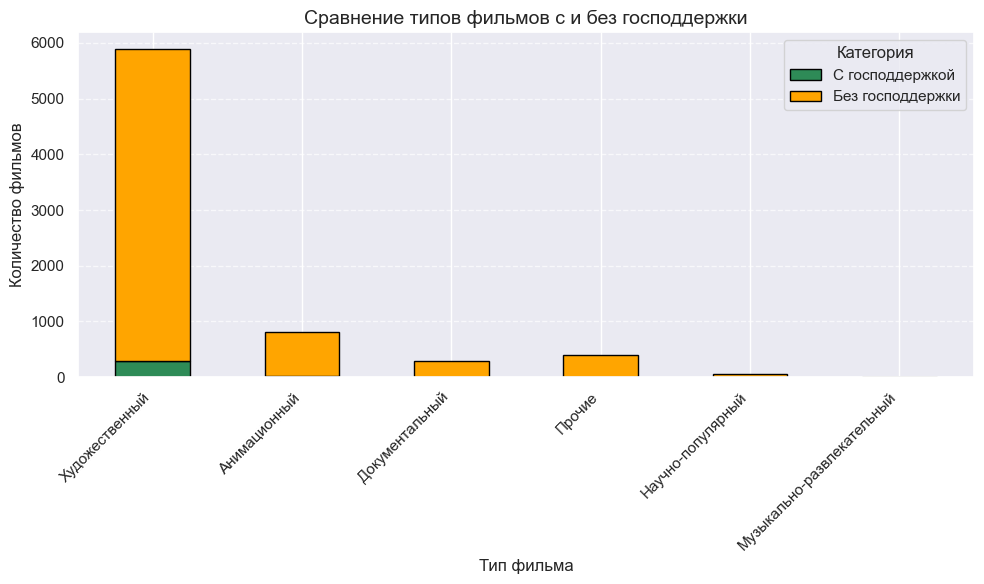

In [132]:
# Подсчёт типов
support_types = support_data['type'].value_counts()
no_support_types = no_support_data['type'].value_counts()

# Объединение и заполнение пропущенных значений
type_df = pd.DataFrame({
    'С господдержкой': support_types,
    'Без господдержки': no_support_types
}).fillna(0).astype(int)

# Сортировка по сумме двух колонок (сначала самые популярные)
type_df = type_df.sort_values(by=['С господдержкой', 'Без господдержки'], ascending=False)

# Построение графика
ax = type_df.plot(kind='bar', stacked=True, figsize=(10, 6),
                  color=['seagreen', 'orange'], edgecolor='black')

plt.title('Сравнение типов фильмов с и без господдержки', fontsize=14)
plt.xlabel('Тип фильма')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Категория')
plt.tight_layout()
plt.show()


**🎬 Сравнение типов фильмов с и без господдержки**

1. **Художественные фильмы** — основной тип, получающий господдержку.  
   Составляют более 90% всех поддержанных фильмов.

2. **Анимационные фильмы** также получают поддержку, но в значительно меньших объёмах.

3. **Документальные, научно-популярные и прочие типы** практически не представлены среди поддержанных проектов.  
   Господдержка в этих сегментах — **единичные случаи**.

📌 Это может говорить о приоритетах Минкульта в сфере кино: ставка делается на художественные проекты массового жанра, в то время как ниши образовательного и альтернативного контента остаются вне фокуса.


,director_first,type,Кол_во_фильмов
92,Кристофер Нолан,Художественный,8
125,Питер Джексон,Художественный,7
187,Ю.Озеров,Художественный,6
40,Гай Ричи,Художественный,6
93,Л.Гайдай,Художественный,6
175,Хаяо Миядзаки,Анимационный,5
69,Дэвид Финчер,Художественный,4
67,Дэвид Йейтс,Художественный,4
136,Роберт Земекис,Художественный,3
64,Дин Деблуа,Анимационный,3


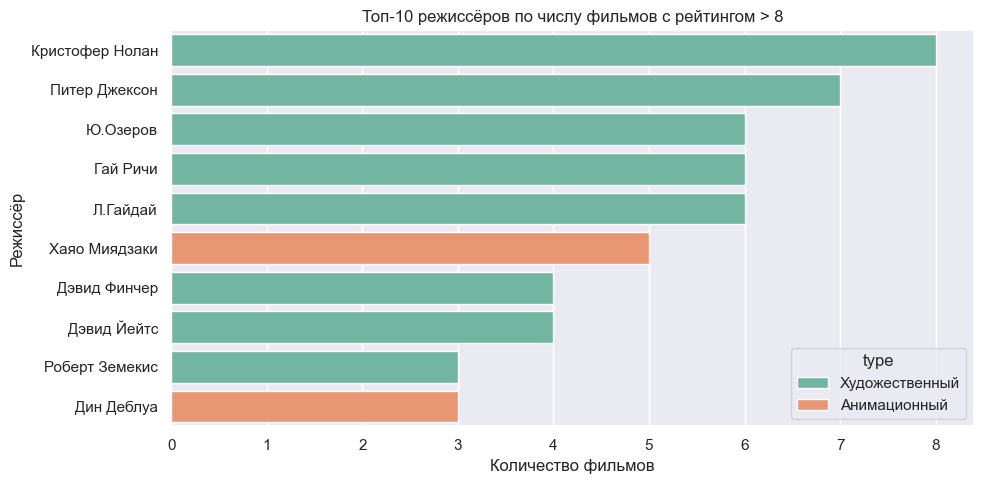

In [135]:
# Выведем имена главных режиссеров, чьи фильмы получили максимальные оценки зрителей, а также их жанры:
top_directors = (
    df.query('ratings > 8')
      .groupby(['director_first', 'type'])
      .agg(Кол_во_фильмов=('ratings', 'count'))
      .reset_index()
      .sort_values(by='Кол_во_фильмов', ascending=False)
      .head(10)
)

display(top_directors)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_directors, x='Кол_во_фильмов', y='director_first', hue='type', palette='Set2')
plt.title('Топ-10 режиссёров по числу фильмов с рейтингом > 8')
plt.xlabel('Количество фильмов')
plt.ylabel('Режиссёр')
plt.tight_layout()
plt.show()

,Страна,Количество фильмов
0,США,104
1,Россия,53
2,СССР,41
3,Великобритания,24
4,Франция,12
5,Германия,7
6,Япония,7
7,РеспубликаКипр,5
8,Ирландия,3
9,Индия,3


/var/folders/vj/zrl1f6497v3146z6rynl8c880000gn/T/ipykernel_59246/4095927524.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Количество фильмов', y='Страна', palette='viridis')


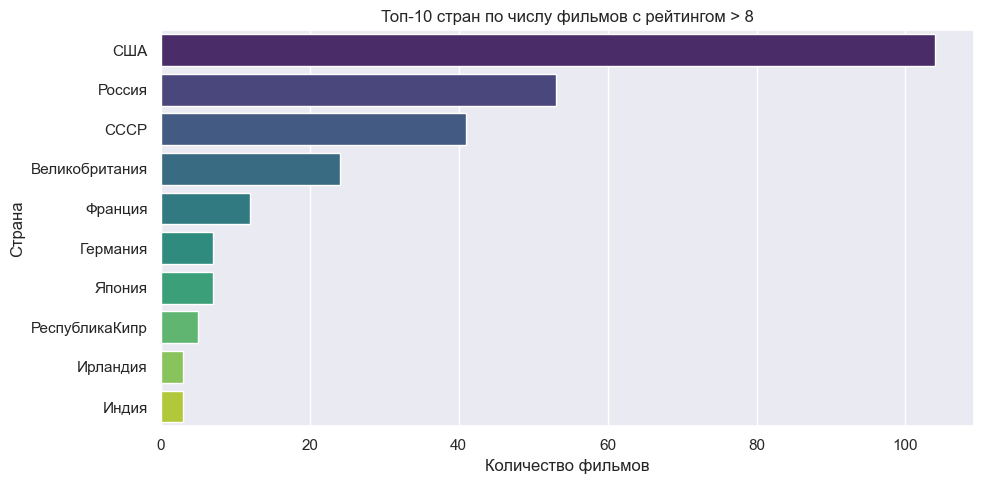

In [137]:
# Выведем страны, где были сняты фильмы, которые получили максимальные оценки зрителей:
top_countries = (
    df.query('ratings > 8')
      .groupby('country_first')['ratings']
      .count()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
      .rename(columns={'ratings': 'Количество фильмов', 'country_first': 'Страна'})
)

display(top_countries)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_countries, x='Количество фильмов', y='Страна', palette='viridis')
plt.title('Топ-10 стран по числу фильмов с рейтингом > 8')
plt.xlabel('Количество фильмов')
plt.ylabel('Страна')
plt.tight_layout()
plt.show()


**ОБЪЕМ ГОСПОДДЕРЖКИ**

С 2010 по 2019 год в прокат вышло 332 фильма с господдержкой. Для них, как правило, выдавалось одно прокатное удостоверение, в то время как среди остальных фильмов каждый десятый получал два.

Суммарно с 2013 по 2019 год было выделено 20,2 млрд руб.

- Медианная поддержка на фильм — 35 млн руб.

- Средняя — 61 млн руб. (сильно искажена отдельными крупными суммами, до 500 млн руб.)

- Минимальная поддержка — 3 млн руб.

Распределение по годам:

- 2013: всего 2 фильма, в среднем — 67 млн руб на фильм

-  2015: пик по количеству фильмов — 86

- 2019: рекорд по объёму поддержки — 4,9 млрд руб., при этом количество фильмов — 70

После 2015 года число фильмов сокращалось, но с 2018 года снова начался рост.



**ОКУПАЕМОСТЬ ФИЛЬМОВ С ГОСПОДДЕРЖКОЙ**

Общие кассовые сборы составили 42 млрд руб., что лишь на 1,5 млрд больше общего бюджета.
Окупаемость была достигнута только в:

- 2017 — прибыль 4 млрд руб.

- 2018 — прибыль 3,3 млрд руб.

Во все остальные годы фильмы с господдержкой не окупались.
**Наибольший убыток** — в 2019 году: минус 2,6 млрд руб.

Сравнить с фильмами без господдержки невозможно — данные о бюджете у них отсутствуют.


**РЕЙТИНГ ФИЛЬМОВ С ГОС.ПОДДЕРЖКОЙ**

- Медианный рейтинг фильмов с господдержкой — 6.2;

- У фильмов без поддержки — 6.6;

Максимальный рейтинг фильмов с поддержкой — 8.5, без — до 9.2.

Фильмы без участия государства оцениваются выше и вызывают больше симпатии у зрителей.

**ВОЗРАСТНАЯ КАТЕГОРИЯ ФИЛЬМОВ С ГОС.ПОДДЕРЖКОЙ**

- основная категория — 16+ (более трети всех фильмов в обеих группах);

- среди фильмов с поддержкой на втором месте — 12+, а 18+ почти не представлены;

- у фильмов без поддержки — наоборот: 18+ — на втором месте;

- 6+ чаще встречаются в фильмах с поддержкой, чем без.


**ЖАНРЫ ФИЛЬМОВ С ГОС.ПОДДЕРЖКОЙ**

Фильмы с поддержкой сосредоточены в двух жанрах:

- 90% — художественные

- 10% — анимация

У фильмов без господдержки жанровое разнообразие значительно выше:
встречаются документальные, научно-популярные и другие ниши.

### Шаг 5. Общие выводы

Была поставлена задача изучить рынок российского кинопроката и выявить текущие тренды. 
Мы получили данные о прокатных удостоверениях, сборах и государственной поддержке фильмов и сделали следующие выводы:

#### 📊 Общие выводы по исследованию российского кинопроката (2010–2019)

#### 🎥 Общее количество фильмов в прокате

- В среднем в год в прокат выходило **около 677 фильмов**.
- 📉 Минимум — в **2019 году**: 218 фильмов.
- 📈 Максимум — в **2010 году**: 985 фильмов.

#### 💰 Кассовые сборы

- Общий объём сборов рос из года в год за счёт **роста средней выручки**.
- Минимум — **2,4 млн руб.** (2010), максимум — **201,8 трлн руб.** (2018).  
  ⛔ Часть значений вызывает сомнения — вероятно, ошибки при выгрузке (в разрядах или валюте).
- **Медиана** значительно ниже среднего, что указывает на наличие **нескольких суперхитов**, искажающих статистику.

#### 👶 Возрастные ограничения и сборы

- Фильмы с категориями **0+ и 18+** приносят **меньше сборов**, чем **6+ / 12+ / 16+**.
- Возможные причины:
  - Ограниченная аудитория (только дети / только взрослые).
  - Основной потребитель — **молодёжь и подростки**, посещающие кинотеатры массово.

#### 🎬 Самые успешные фильмы

- Все фильмы с рейтингом **выше 8 баллов** — **художественные**, за редким исключением (мультфильм).
- Топ-режиссёры по оценкам зрителей:  
  **К. Нолан, П. Джексон, Г. Ричи, Ю. Озеров, Л. Гайдай, Х. Миядзаки, Д. Финчер, Д. Йейтс, М. Скорсезе, Л. Бессон**
- Самые высоко оценённые фильмы сняты в: **США, России, СССР, Великобритании и Франции**.

---

#### 🎞 Фильмы с господдержкой

- Всего с господдержкой было снято **332 фильма** (~5% от всех).
- Общий объём господдержки с 2013 по 2019 годы — **20,2 млрд руб.**  
  - **Медианная поддержка** — 35 млн руб.  
  - **Минимум** — 3 млн руб.

- Общие сборы фильмов с господдержкой — **42 млрд руб.**, что **лишь на 1,5 млрд** превышает их суммарный бюджет.
- **Окупаемость достигнута только в 2017 и 2018 годах**, в остальные — убытки.
- Наибольший убыток — **в 2019 году**: минус 2,6 млрд руб.

#### ⭐ Рейтинги

- Медианный рейтинг фильмов с поддержкой — **6.2**, без — **6.6**
- Фильмы без поддержки чаще получают **высокие оценки** (до 9.2 балла).
- 📌 **Зрители лучше оценивают фильмы без участия государства.**

#### 🔞 Возрастные категории

- В обеих группах наиболее распространена категория **16+**.
- Среди фильмов **с поддержкой** второе место занимает **12+**, а **18+** — крайне редки.
- У фильмов **без поддержки** наоборот — **18+** уверенно на втором месте.

#### 🧬 Жанровое разнообразие

- Фильмы с поддержкой **монотонны**:
  - **90%** — художественные  
  - **10%** — анимация  
- Фильмы без поддержки — **более разнообразны**:
  - Включают **документальные, научно-популярные и другие** жанры

---

#### 🧠 Общий вывод

Господдержка в кино сосредоточена на художественных проектах категории 12+ и 16+, однако по зрительским оценкам и окупаемости такие фильмы **уступают** независимым.  
При дальнейшем планировании государственной политики в сфере кино стоит учитывать:
- неэффективность части инвестиций;
- слабый зрительский отклик;
- недостаточную жанровую и возрастную диверсификацию.
